# DSFM Assignment

Name: Deepak Perla                                                                                                     
Registration No: 190C2030045 / 190137

### By Group 5

1) Vuyyuru Mohith Reddy_190C2020021

2) Sai Ram Sunkara_190C2030061

3) Sricharan Kandagatla_190C2030089

4) Deepak Perla_190C2030045

5) Srinivasa Lakshman Sunkara_190C2030062

### Import Libraries

In [1]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import os
import pandas as pd

from pandas_datareader import data as pdr
import pickle
import requests
from collections import Counter
import yfinance as yf
yf.pdr_override()

In [2]:
sp500url ='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table =pd.read_html(sp500url)

In [3]:
data_table[0]

Symbol              Security SEC filings             GICS Sector  \
0      MMM                    3M     reports             Industrials   
1      AOS           A. O. Smith     reports             Industrials   
2      ABT                Abbott     reports             Health Care   
3     ABBV                AbbVie     reports             Health Care   
4     ABMD               Abiomed     reports             Health Care   
..     ...                   ...         ...                     ...   
498    YUM           Yum! Brands     reports  Consumer Discretionary   
499   ZBRA    Zebra Technologies     reports  Information Technology   
500    ZBH         Zimmer Biomet     reports             Health Care   
501   ZION  Zions Bancorporation     reports              Financials   
502    ZTS                Zoetis     reports             Health Care   

                      GICS Sub-Industry    Headquarters Location  \
0              Industrial Conglomerates    Saint Paul, Minnesota   
1                     Building Products     Milwaukee, Wisconsin   
2                 Health Care Equipment  North Chicago, Illinois   
3                       Pharmaceuticals  North Chicago, Illinois   
4                 Health Care Equipment   Danvers, Massachusetts   
..                                  ...                      ...   
498                         Restaurants     Louisville, Kentucky   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois   
500               Health Care Equipment          Warsaw, Indiana   
501                      Regional Banks     Salt Lake City, Utah   
502                     Pharmaceuticals   Parsippany, New Jersey   

    Date first added      CIK      Founded  
0         1976-08-09    66740         1902  
1         2017-07-26    91142         1916  
2         1964-03-31     1800         1888  
3         2012-12-31  1551152  2013 (1888)  
4         2018-05-31   815094         1981  
..               ...      ...          ...  
498       1997-10-06  1041061         1997  
499       2019-12-23   877212         1969  
500       2001-08-07  1136869         1927  
501       2001-06-22   109380         1873  
502       2013-06-21  1555280         1952  

[503 rows x 9 columns]

### 1. Please download data from the S&P 500 index from January 2000 to June 2022 for those stocks that were present for the full time.

#### Saving stocks tickers

In [7]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker.strip())
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

tickers=save_sp500_tickers()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

#### Saving sectors

In [8]:
def save_sp500_Sectors():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    sectors = []
    for row in table.findAll('tr')[1:]:
        sector = row.findAll('td')[3].text
        sectors.append(sector.strip())
    with open("sp500sectors.pickle", "wb") as f:
        pickle.dump(sectors, f)
    return sectors

sectors=save_sp500_Sectors()
sectors

['Industrials',
 'Industrials',
 'Health Care',
 'Health Care',
 'Health Care',
 'Information Technology',
 'Communication Services',
 'Consumer Staples',
 'Information Technology',
 'Information Technology',
 'Consumer Discretionary',
 'Utilities',
 'Financials',
 'Health Care',
 'Materials',
 'Information Technology',
 'Industrials',
 'Materials',
 'Real Estate',
 'Health Care',
 'Industrials',
 'Utilities',
 'Financials',
 'Communication Services',
 'Communication Services',
 'Consumer Staples',
 'Consumer Discretionary',
 'Materials',
 'Information Technology',
 'Utilities',
 'Industrials',
 'Utilities',
 'Financials',
 'Financials',
 'Real Estate',
 'Utilities',
 'Financials',
 'Health Care',
 'Industrials',
 'Health Care',
 'Information Technology',
 'Information Technology',
 'Information Technology',
 'Financials',
 'Energy',
 'Information Technology',
 'Information Technology',
 'Consumer Discretionary',
 'Information Technology',
 'Financials',
 'Financials',
 'Communication 

### 2. Arrange all the stocks in sectors for the closing price.

In [10]:
merge = list(zip(tickers,sectors))
merge

[('MMM', 'Industrials'),
 ('AOS', 'Industrials'),
 ('ABT', 'Health Care'),
 ('ABBV', 'Health Care'),
 ('ABMD', 'Health Care'),
 ('ACN', 'Information Technology'),
 ('ATVI', 'Communication Services'),
 ('ADM', 'Consumer Staples'),
 ('ADBE', 'Information Technology'),
 ('ADP', 'Information Technology'),
 ('AAP', 'Consumer Discretionary'),
 ('AES', 'Utilities'),
 ('AFL', 'Financials'),
 ('A', 'Health Care'),
 ('APD', 'Materials'),
 ('AKAM', 'Information Technology'),
 ('ALK', 'Industrials'),
 ('ALB', 'Materials'),
 ('ARE', 'Real Estate'),
 ('ALGN', 'Health Care'),
 ('ALLE', 'Industrials'),
 ('LNT', 'Utilities'),
 ('ALL', 'Financials'),
 ('GOOGL', 'Communication Services'),
 ('GOOG', 'Communication Services'),
 ('MO', 'Consumer Staples'),
 ('AMZN', 'Consumer Discretionary'),
 ('AMCR', 'Materials'),
 ('AMD', 'Information Technology'),
 ('AEE', 'Utilities'),
 ('AAL', 'Industrials'),
 ('AEP', 'Utilities'),
 ('AXP', 'Financials'),
 ('AIG', 'Financials'),
 ('AMT', 'Real Estate'),
 ('AWK', 'Util

In [11]:
merge.sort(key=lambda x:x[1])

In [12]:
merge

[('ATVI', 'Communication Services'),
 ('GOOGL', 'Communication Services'),
 ('GOOG', 'Communication Services'),
 ('T', 'Communication Services'),
 ('CHTR', 'Communication Services'),
 ('CMCSA', 'Communication Services'),
 ('DISH', 'Communication Services'),
 ('DIS', 'Communication Services'),
 ('EA', 'Communication Services'),
 ('FOXA', 'Communication Services'),
 ('FOX', 'Communication Services'),
 ('IPG', 'Communication Services'),
 ('LYV', 'Communication Services'),
 ('LUMN', 'Communication Services'),
 ('MTCH', 'Communication Services'),
 ('META', 'Communication Services'),
 ('NFLX', 'Communication Services'),
 ('NWSA', 'Communication Services'),
 ('NWS', 'Communication Services'),
 ('OMC', 'Communication Services'),
 ('PARA', 'Communication Services'),
 ('TMUS', 'Communication Services'),
 ('TTWO', 'Communication Services'),
 ('TWTR', 'Communication Services'),
 ('VZ', 'Communication Services'),
 ('WBD', 'Communication Services'),
 ('AAP', 'Consumer Discretionary'),
 ('AMZN', 'Con

In [39]:
lkp = {
"Consumer Discretionary":"CD",
"Consumer Staples":"CS",
"Energy":"EG",
"Financials":"FN",
"Health Care":"HC",
"Industrials":"IN",
"Information Technology":"IT",
"Materials":"MT",
"Telecommunication Services":"TC",
"Utilities":"UT",
"Communication Services":"COM",
"Real Estate":"RE"
}

In [16]:
merge = dict(merge)

In [17]:
merge

{'ATVI': 'Communication Services',
 'GOOGL': 'Communication Services',
 'GOOG': 'Communication Services',
 'T': 'Communication Services',
 'CHTR': 'Communication Services',
 'CMCSA': 'Communication Services',
 'DISH': 'Communication Services',
 'DIS': 'Communication Services',
 'EA': 'Communication Services',
 'FOXA': 'Communication Services',
 'FOX': 'Communication Services',
 'IPG': 'Communication Services',
 'LYV': 'Communication Services',
 'LUMN': 'Communication Services',
 'MTCH': 'Communication Services',
 'META': 'Communication Services',
 'NFLX': 'Communication Services',
 'NWSA': 'Communication Services',
 'NWS': 'Communication Services',
 'OMC': 'Communication Services',
 'PARA': 'Communication Services',
 'TMUS': 'Communication Services',
 'TTWO': 'Communication Services',
 'TWTR': 'Communication Services',
 'VZ': 'Communication Services',
 'WBD': 'Communication Services',
 'AAP': 'Consumer Discretionary',
 'AMZN': 'Consumer Discretionary',
 'APTV': 'Consumer Discretionary'

#### Download each stock data csv files

In [18]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2022, 6, 30)
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            # df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
get_data_from_yahoo(reload_sp500=False)

Already have MMM
Already have AOS
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADM
Already have ADBE
Already have ADP
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALGN
Already have ALLE
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AMD
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have AON
Already have APA
Already have AAPL
Already have AMAT
Already have APTV
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have AZO
Already have AVB
Already have AVY
Already have BKR


In [106]:
AAPL = pd.read_csv ('stock_dfs/AAPL.csv', index_col=0)
AAPL

Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-12-31    0.901228    0.918527    0.888393    0.917969    0.783791   
2000-01-03    0.936384    1.004464    0.907924    0.999442    0.853355   
2000-01-04    0.966518    0.987723    0.903460    0.915179    0.781409   
2000-01-05    0.926339    0.987165    0.919643    0.928571    0.792844   
2000-01-06    0.947545    0.955357    0.848214    0.848214    0.724232   
...                ...         ...         ...         ...         ...   
2022-06-23  136.820007  138.589996  135.630005  138.270004  138.078201   
2022-06-24  139.899994  141.910004  139.770004  141.660004  141.463501   
2022-06-27  142.699997  143.490005  140.970001  141.660004  141.463501   
2022-06-28  142.130005  143.419998  137.320007  137.440002  137.249359   
2022-06-29  137.460007  140.669998  136.669998  139.229996  139.036865   

               Volume  
Date                   
1999-12-31  163811200  
2000-01-03  535796800  
2000-01-04  512377600  
2000-01-05  778321600  
2000-01-06  767972800  
...               ...  
2022-06-23   72433800  
2022-06-24   89116800  
2022-06-27   70207900  
2022-06-28   67083400  
2022-06-29   66242400  

[5660 rows x 6 columns]

### 3. Using the daily close price, construct one file with all the stocks 

In [28]:
def compile_data():
    
    main_df = pd.DataFrame()

    for ticker in merge:
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns={'Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], 1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')
        except:
            pass
    main_df.to_csv('sp500_joined_close_price_test.csv')

compile_data()

In [82]:
main_df = pd.read_csv ('sp500_joined_close_price_test.csv', index_col=0)

In [83]:
main_df

ATVI       GOOGL        GOOG          T        CHTR  \
Date                                                                   
1999-12-31   1.276042         NaN         NaN  36.820244         NaN   
2000-01-03   1.369792         NaN         NaN  35.498489         NaN   
2000-01-04   1.328125         NaN         NaN  33.421452         NaN   
2000-01-05   1.333333         NaN         NaN  33.940708         NaN   
2000-01-06   1.307292         NaN         NaN  33.043808         NaN   
...               ...         ...         ...        ...         ...   
2022-06-23  76.489998  112.241997  112.684502  20.610001  455.130005   
2022-06-24  77.940002  117.974998  118.538002  20.990000  463.119995   
2022-06-27  78.010002  115.833504  116.622498  20.780001  464.359985   
2022-06-28  77.160004  112.007500  112.571503  20.610001  457.029999   
2022-06-29  77.959999  111.701500  112.256500  20.950001  463.839996   

                CMCSA       DISH        DIS          EA       FOXA  ...  \
Date                                                                ...   
1999-12-31  15.958333  48.750000  28.855125   21.000000        NaN  ...   
2000-01-03  15.583333  47.593750  29.471687   25.265625        NaN  ...   
2000-01-04  14.416667  45.843750  31.198063   22.343750        NaN  ...   
2000-01-05  14.041667  45.687500  32.492844   22.328125        NaN  ...   
2000-01-06  14.583333  41.093750  31.198063   20.000000        NaN  ...   
...               ...        ...        ...         ...        ...  ...   
2022-06-23  39.110001  16.889999  94.300003  128.960007  32.070000  ...   
2022-06-24  39.570000  18.850000  97.779999  130.199997  32.799999  ...   
2022-06-27  39.830002  18.840000  96.610001  125.599998  33.040001  ...   
2022-06-28  39.130001  18.129999  95.919998  122.879997  32.709999  ...   
2022-06-29  39.330002  17.920000  95.650002  122.830002  32.639999  ...   

                  NEE         NI        NRG        PNW        PPL        PEG  \
Date                                                                           
1999-12-31   5.351563   7.023576        NaN  30.562500  10.652888  17.406250   
2000-01-03   5.156250   6.925344        NaN  29.750000  10.332719  17.031250   
2000-01-04   5.250000   6.999018        NaN  30.125000  10.594675  17.156250   
2000-01-05   5.421875   7.293713        NaN  30.937500  10.827525  17.593750   
2000-01-06   5.421875   7.244597        NaN  31.125000  10.681994  17.656250   
...               ...        ...        ...        ...        ...        ...   
2022-06-23  77.199997  27.809999  37.759998  69.959999  26.610001  60.430000   
2022-06-24  78.019997  28.620001  38.320000  71.750000  27.080000  62.509998   
2022-06-27  77.889999  29.160000  38.610001  72.790001  27.360001  62.830002   
2022-06-28  76.440002  29.350000  37.820000  73.160004  27.129999  62.630001   
2022-06-29  76.000000  29.459999  37.820000  72.300003  27.059999  62.610001   

                   SRE         SO        WEC        XEL  
Date                                                     
1999-12-31   17.375000  14.356150   9.625000  19.500000  
2000-01-03   17.312500  13.897975   9.531250  19.000000  
2000-01-04   17.500000  14.050700   9.593750  19.437500  
2000-01-05   17.875000  14.776144  10.031250  20.187500  
2000-01-06   18.375000  14.814325  10.000000  20.000000  
...                ...        ...        ...        ...  
2022-06-23  146.350006  69.279999  95.339996  67.279999  
2022-06-24  149.440002  69.830002  97.160004  68.559998  
2022-06-27  150.669998  70.370003  99.279999  69.330002  
2022-06-28  151.210007  70.620003  99.120003  69.989998  
2022-06-29  150.309998  70.669998  99.309998  70.209999  

[5661 rows x 503 columns]

### 4.Plot all the closing time series in 3X3 subplots

<Figure size 432x288 with 0 Axes>

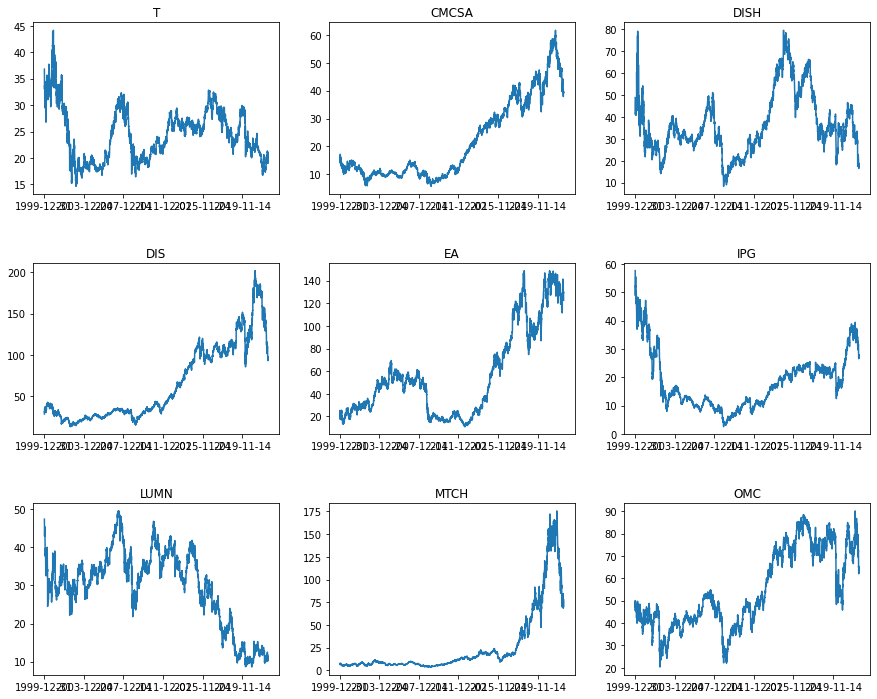

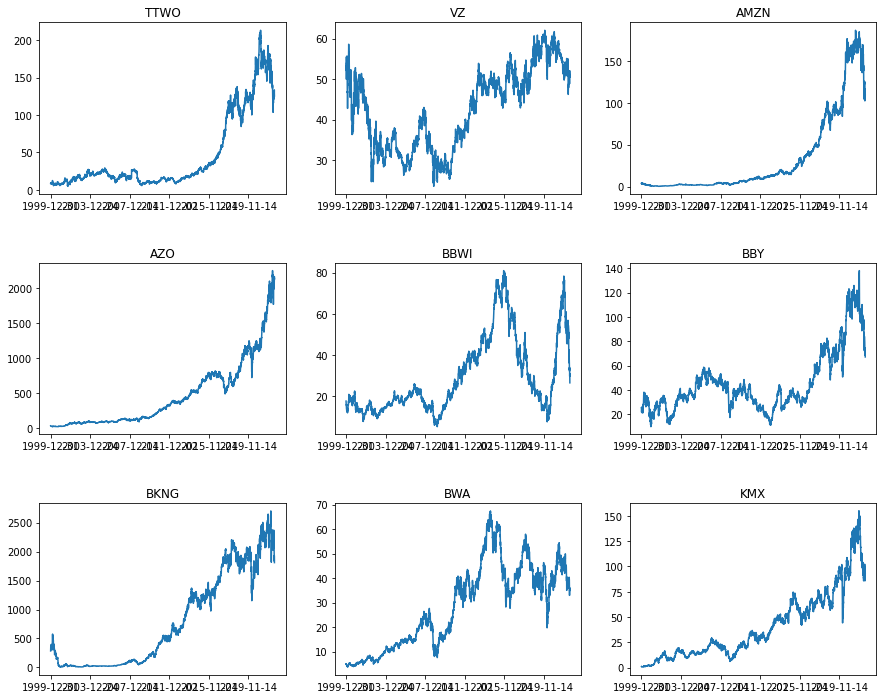

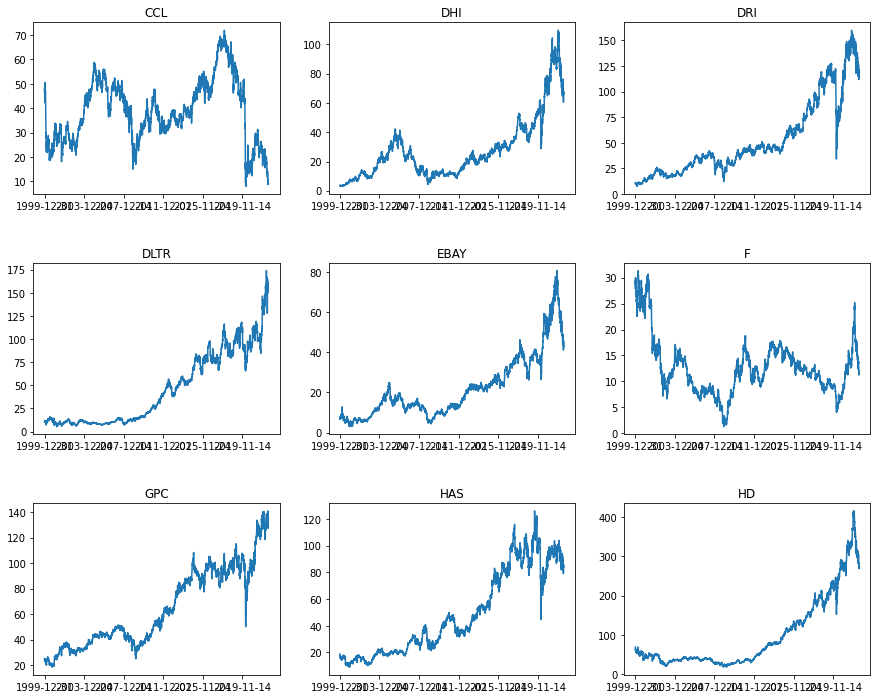

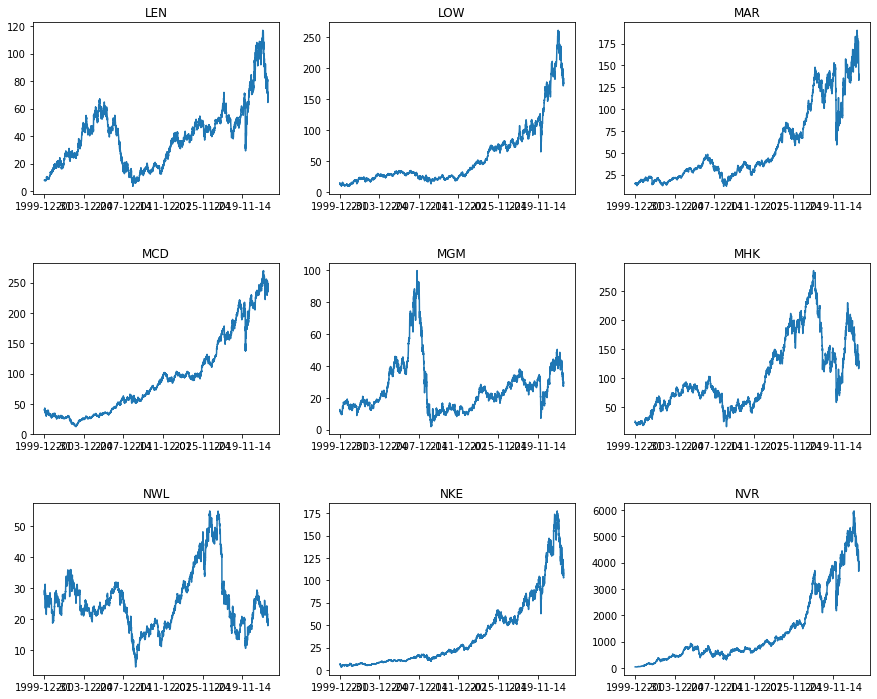

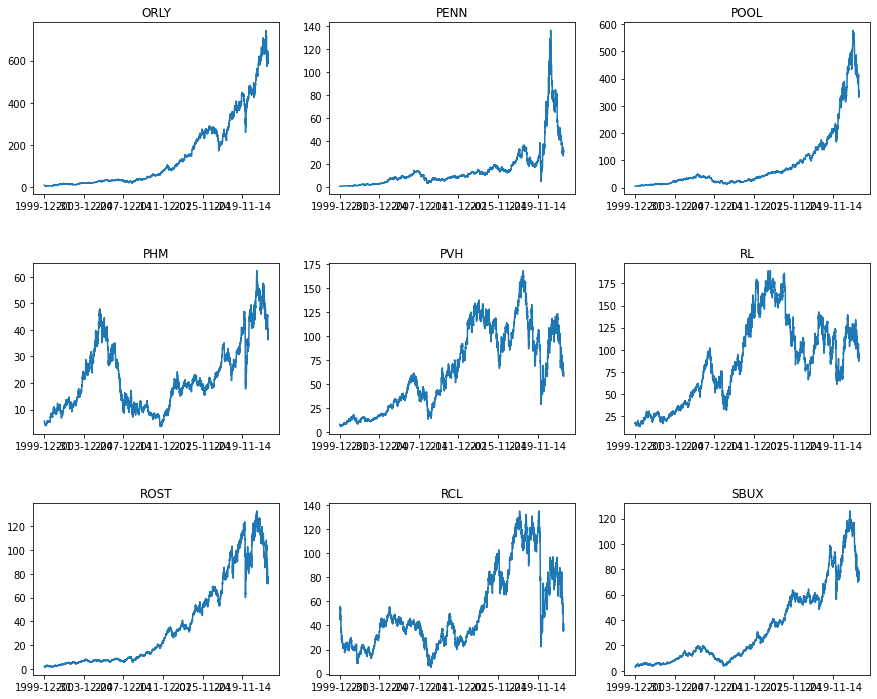

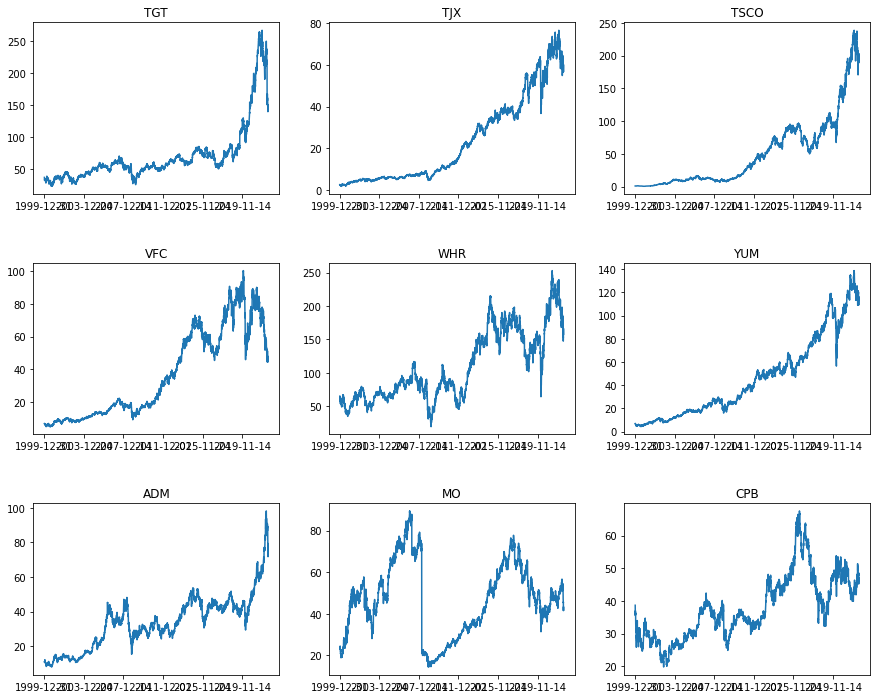

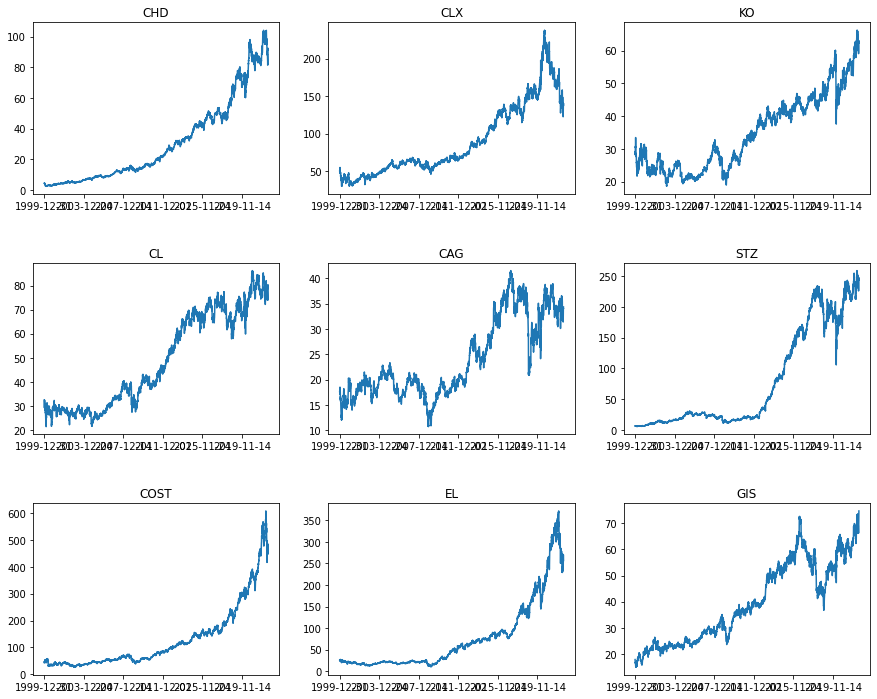

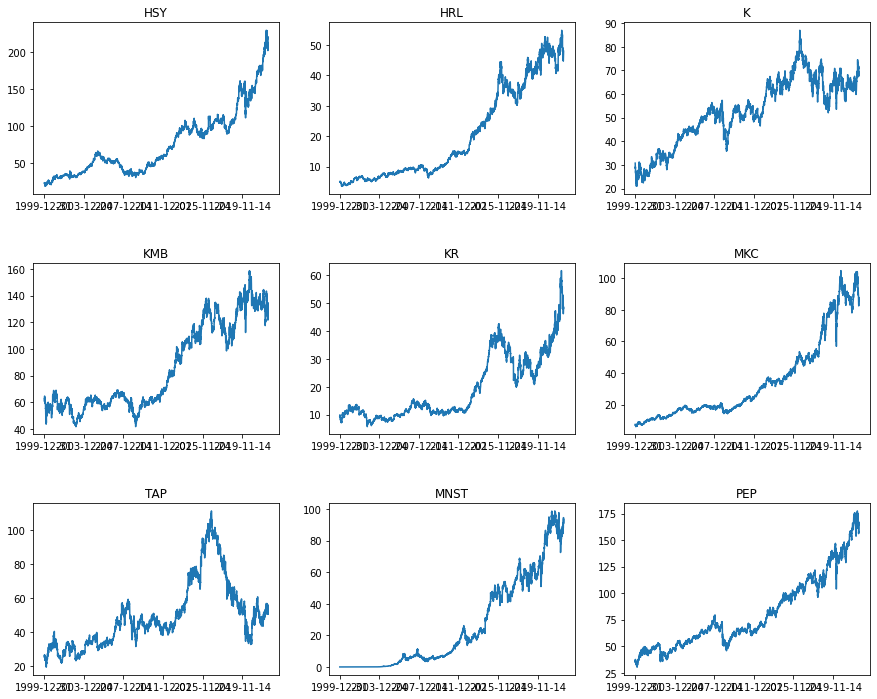

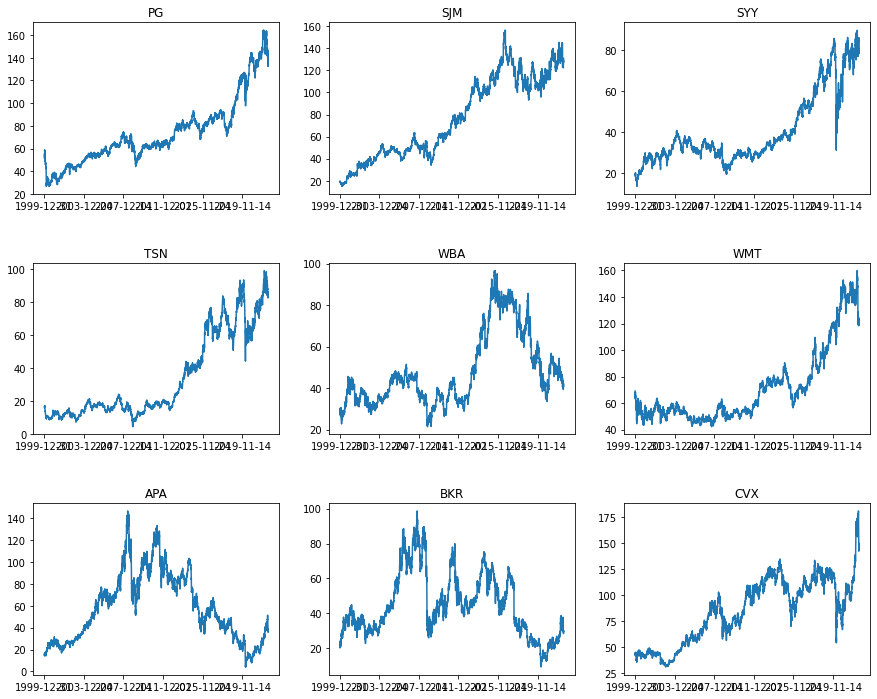

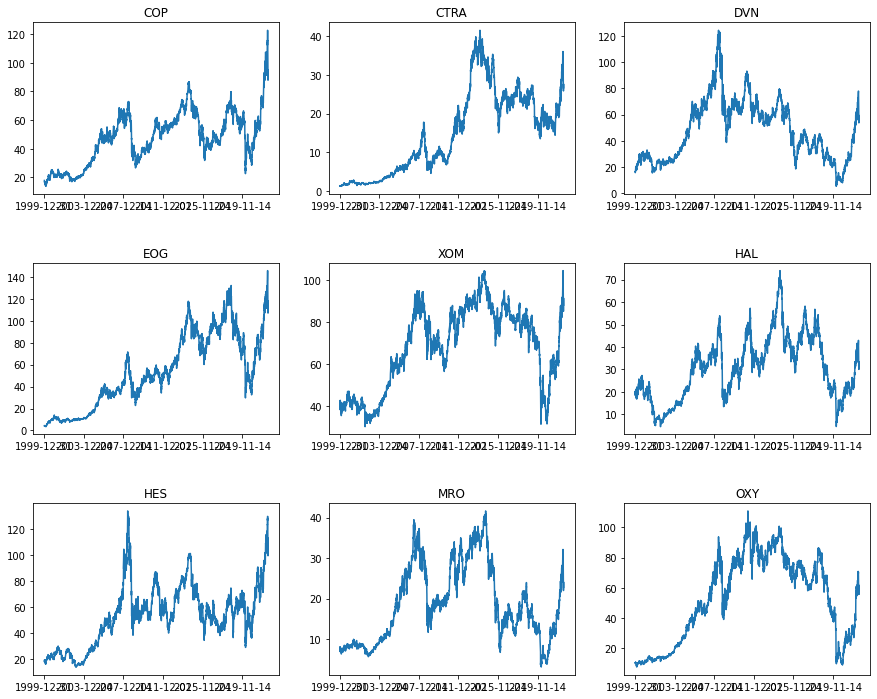

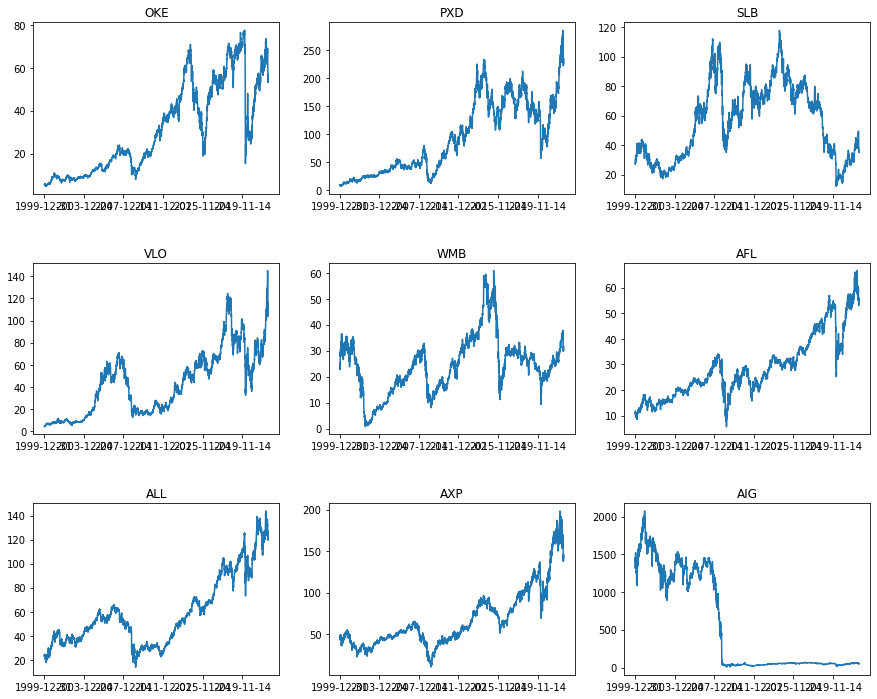

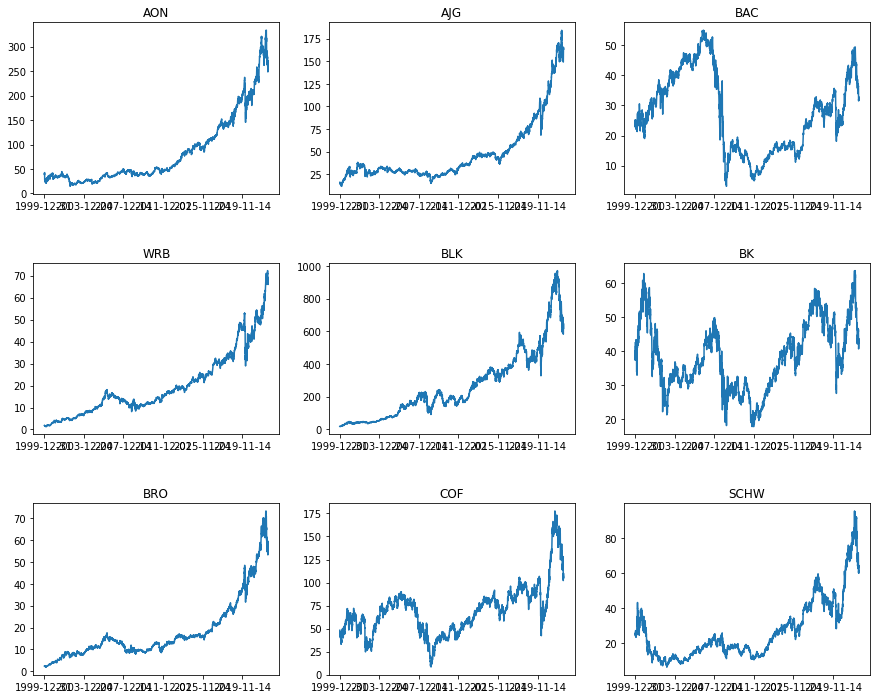

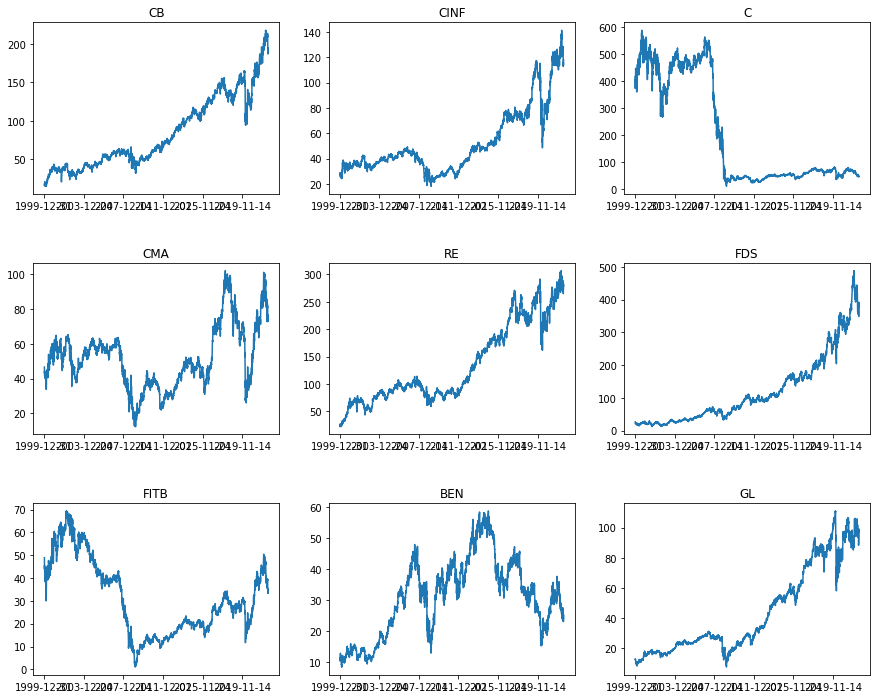

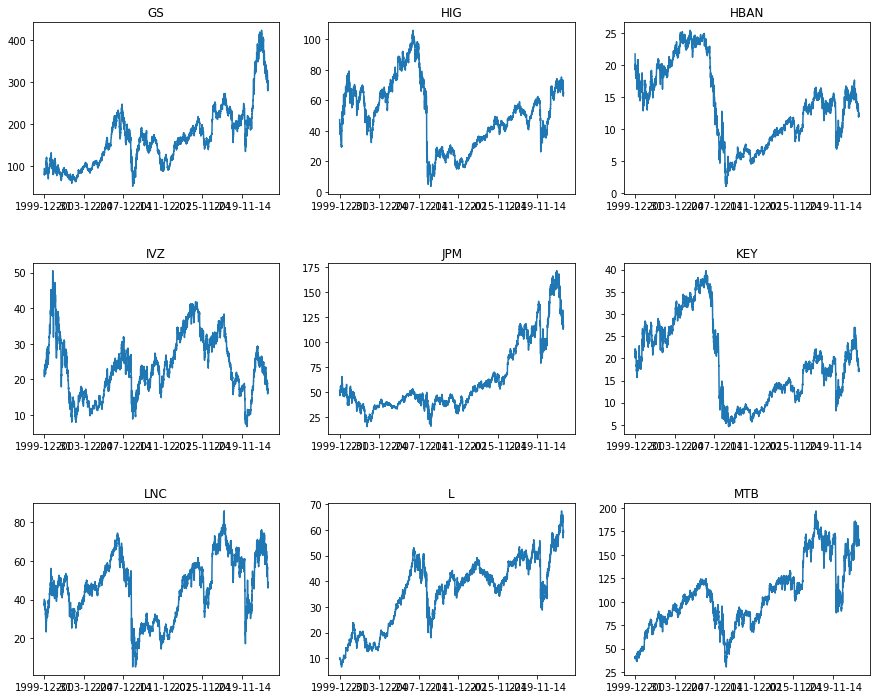

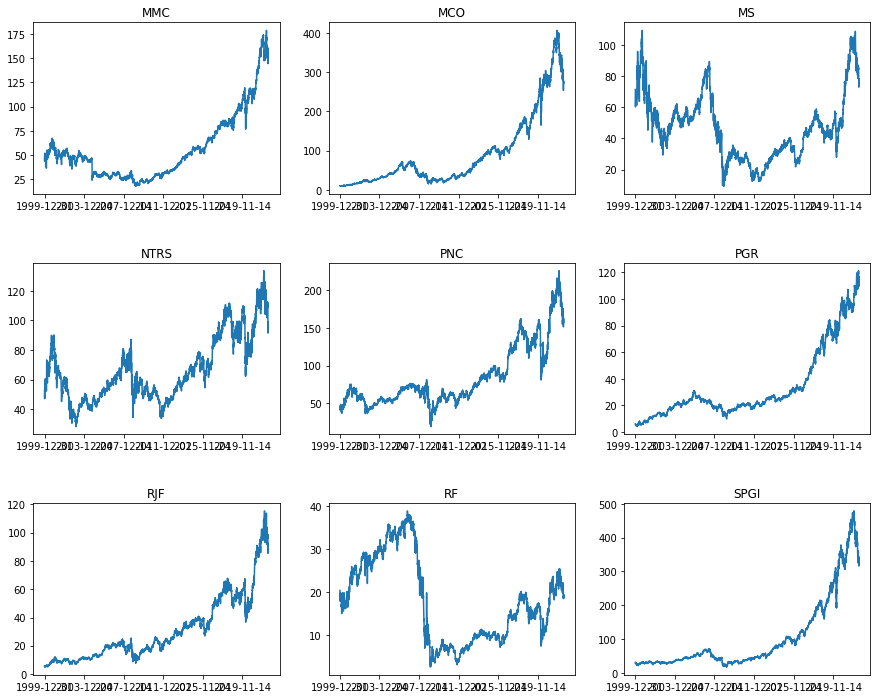

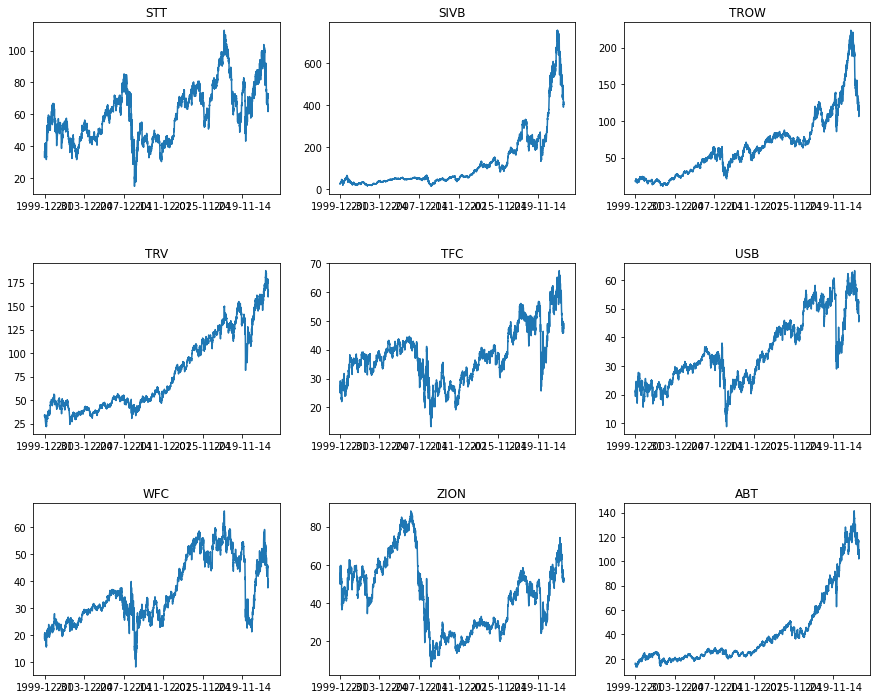

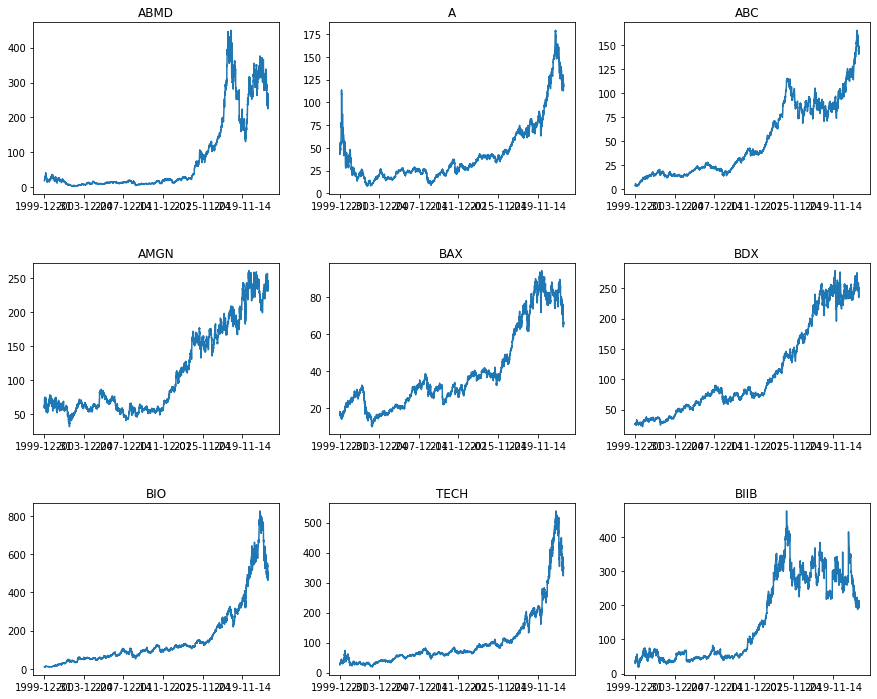

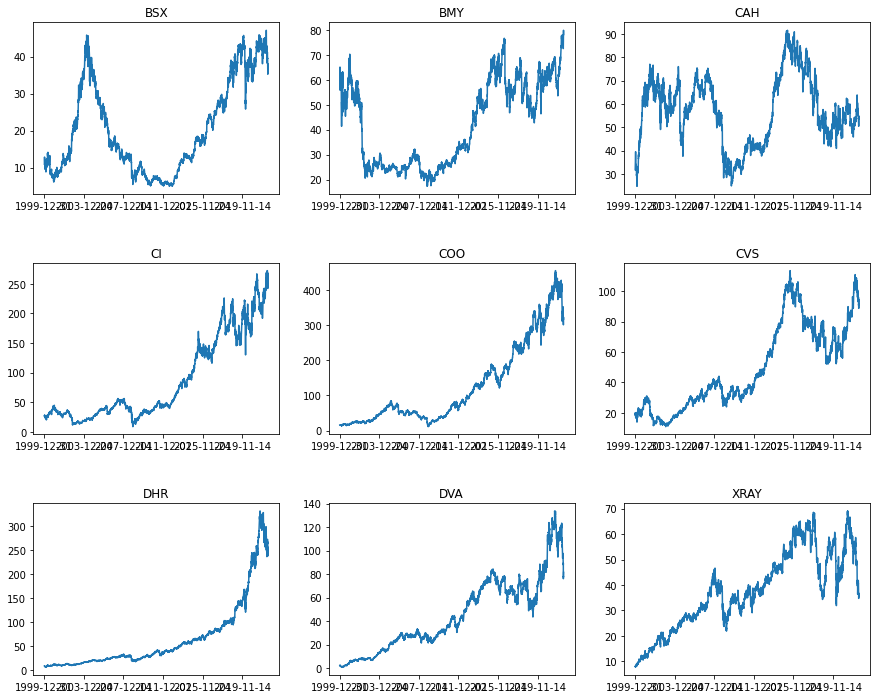

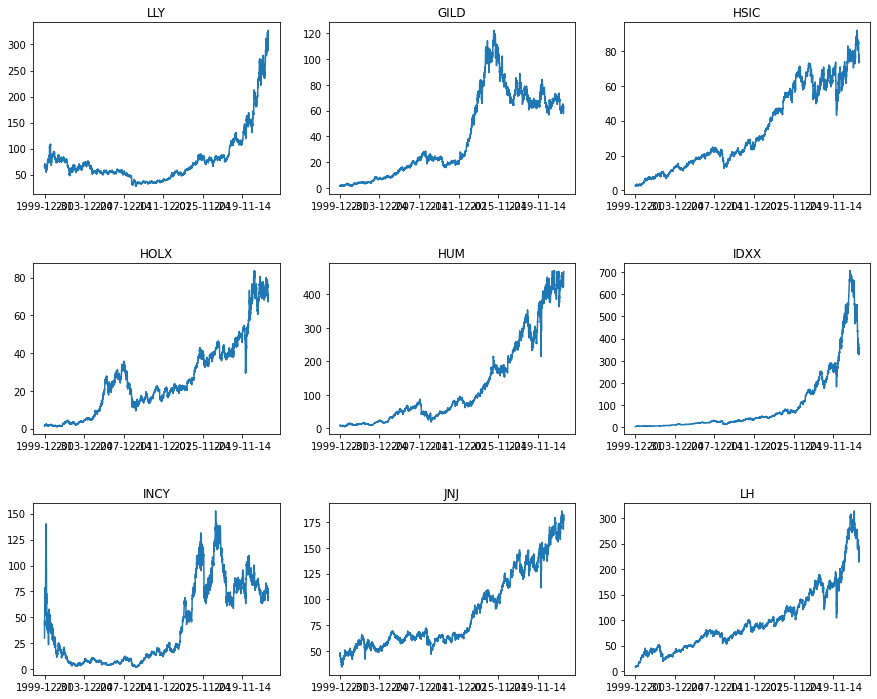

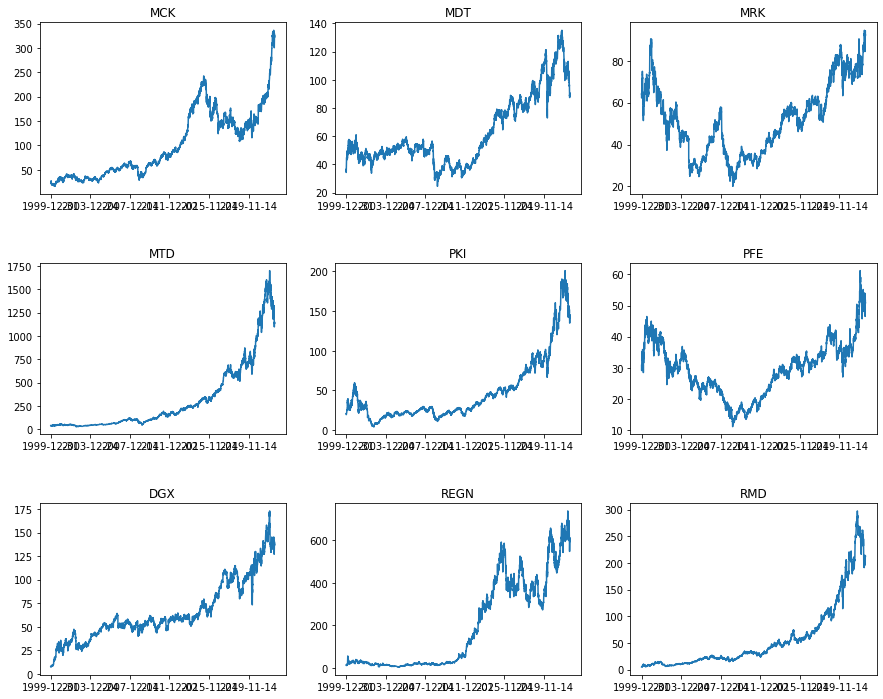

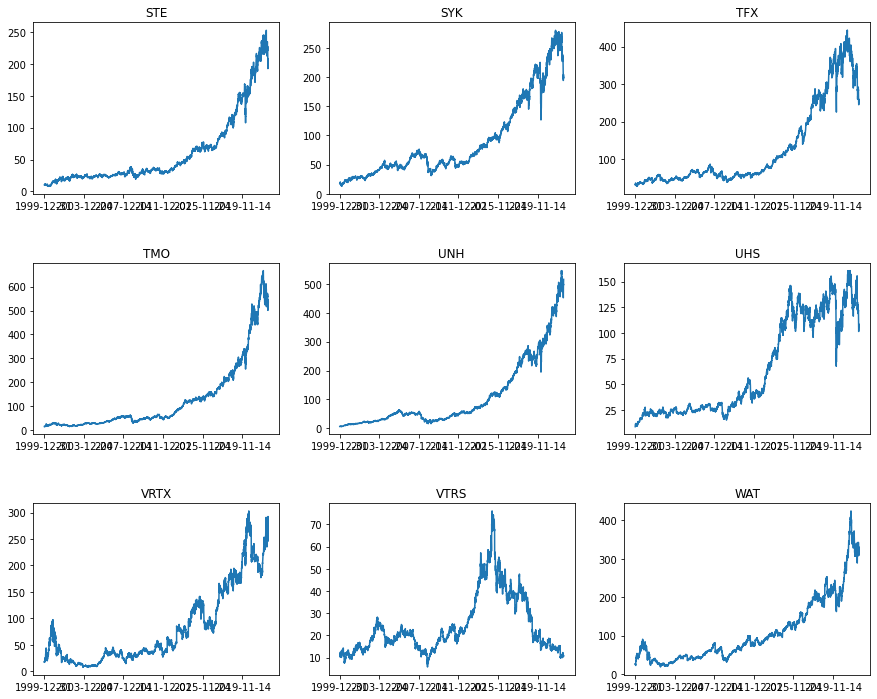

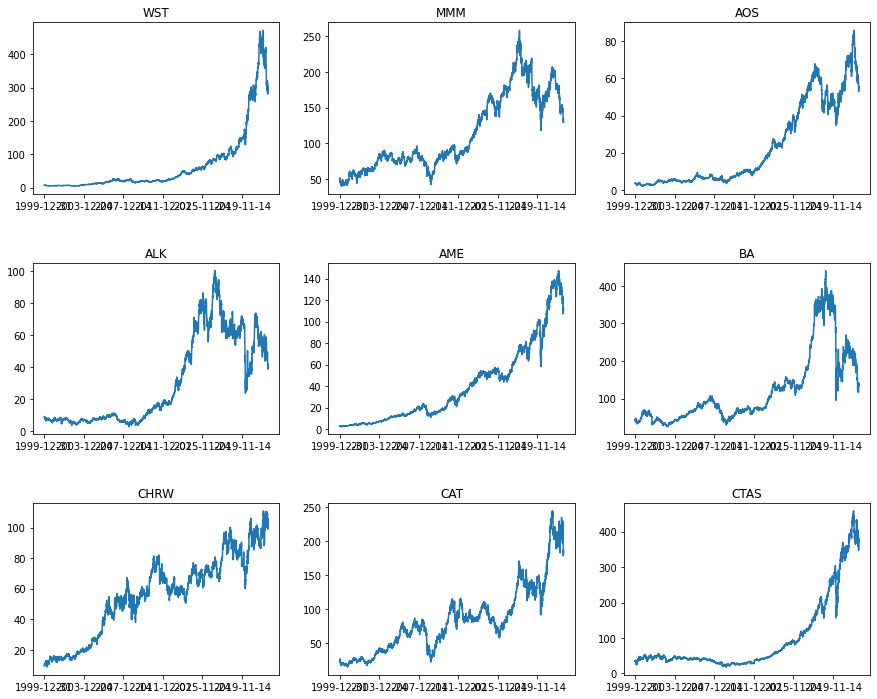

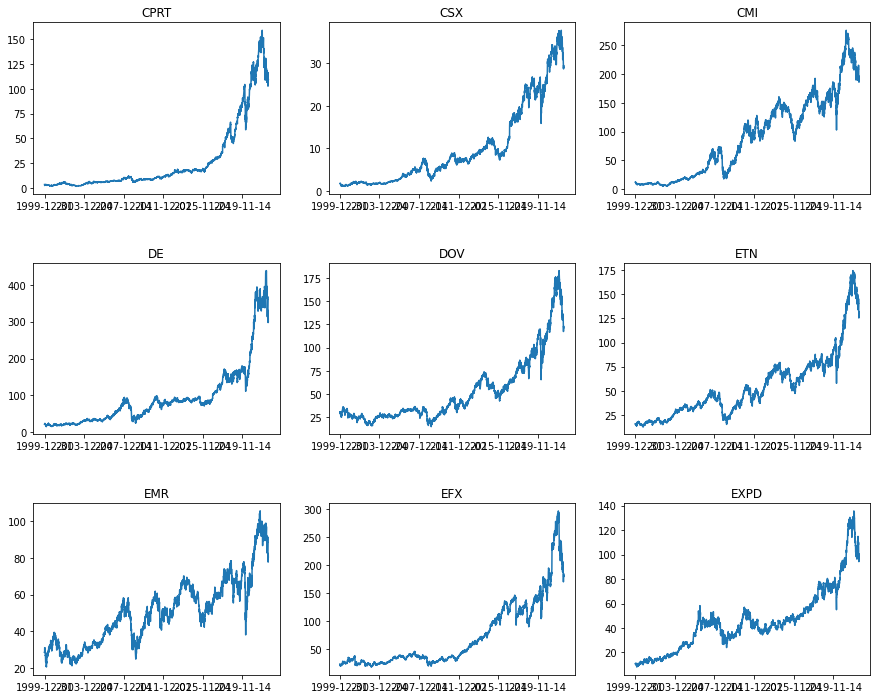

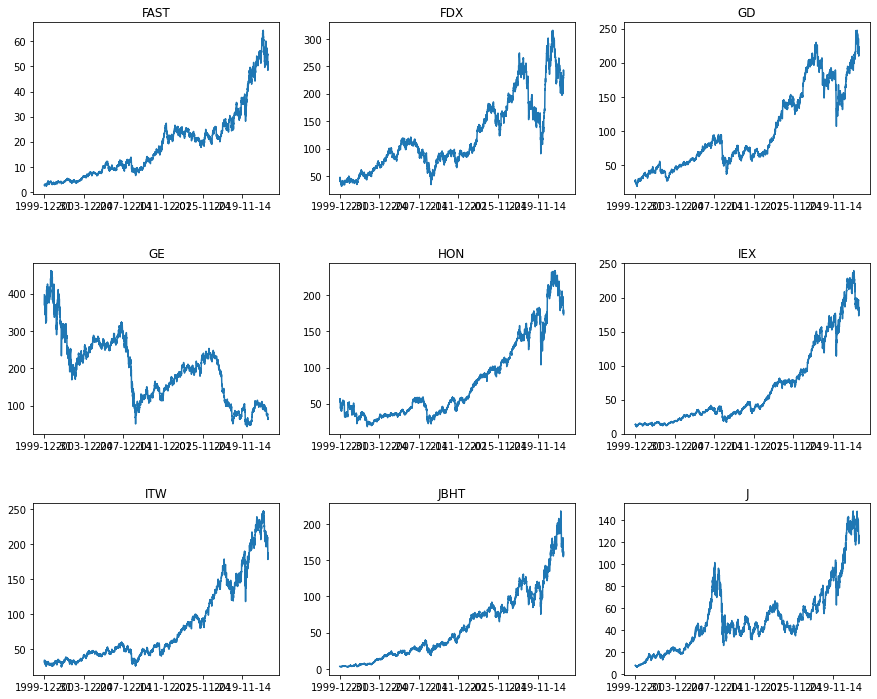

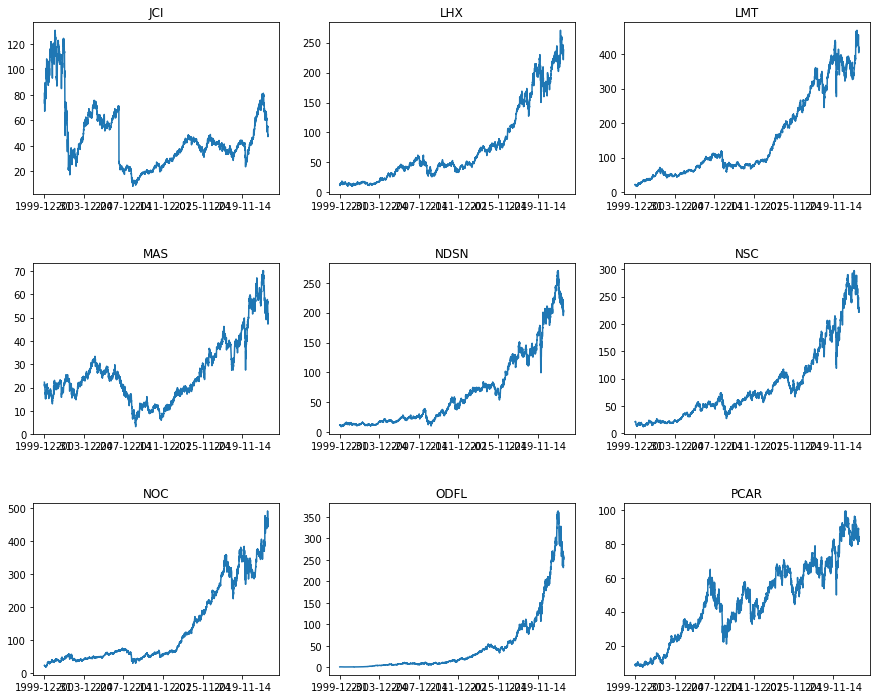

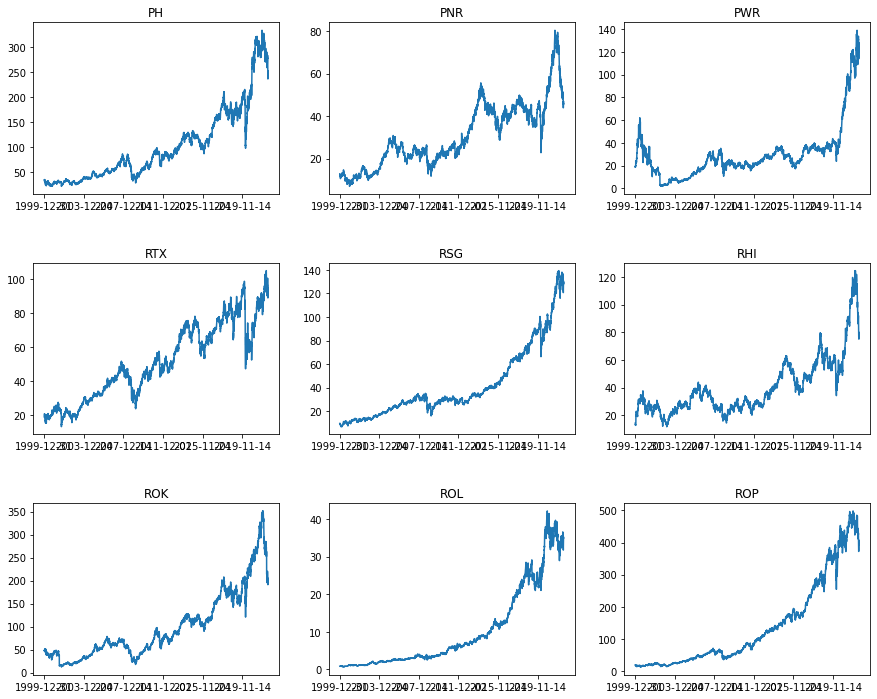

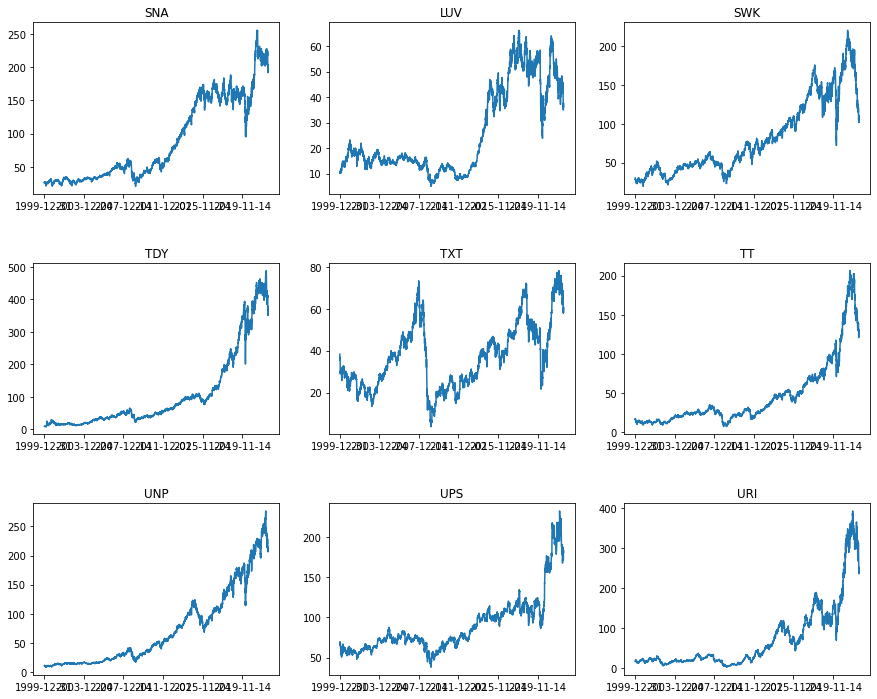

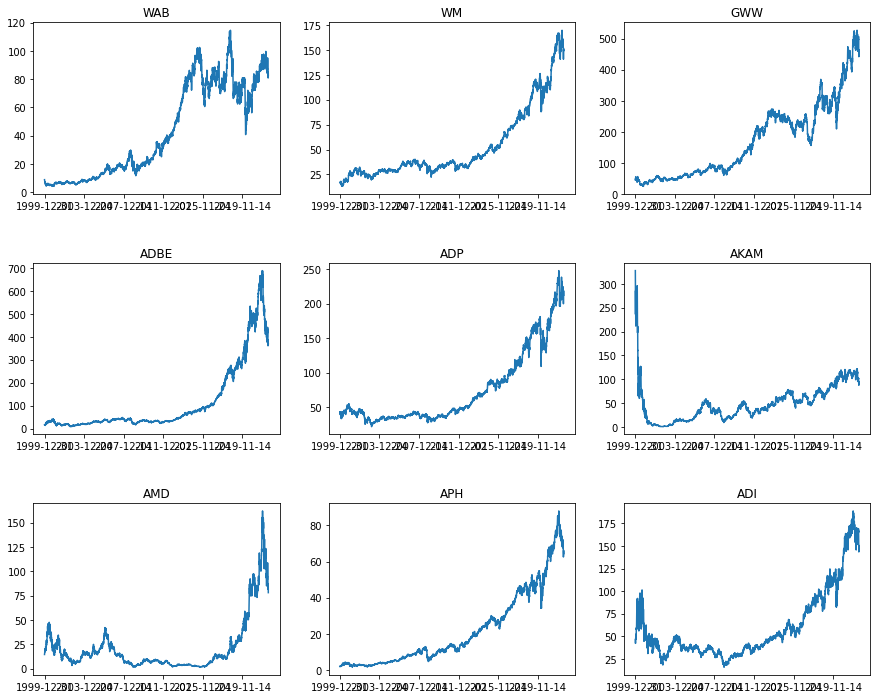

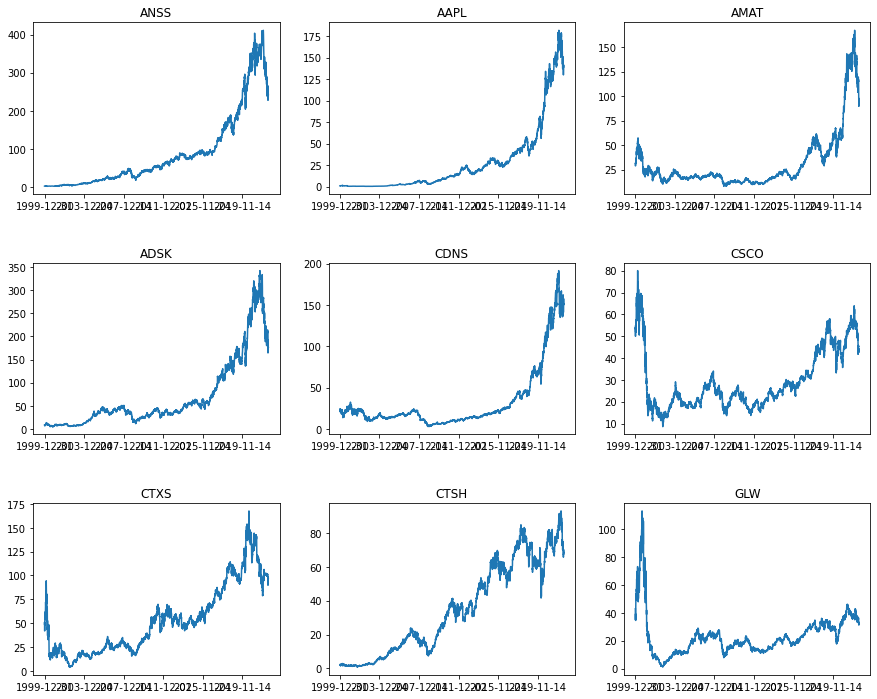

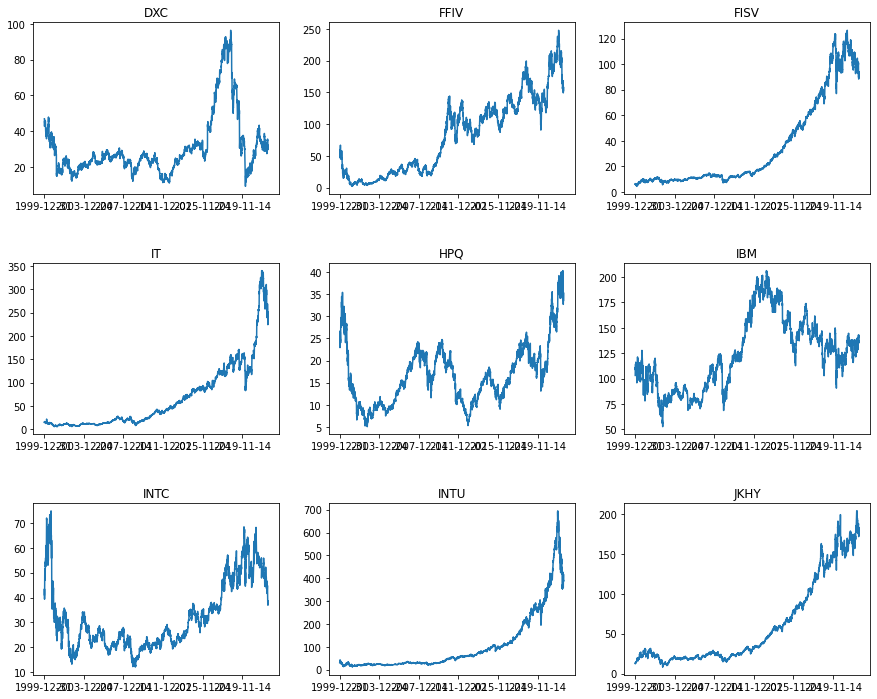

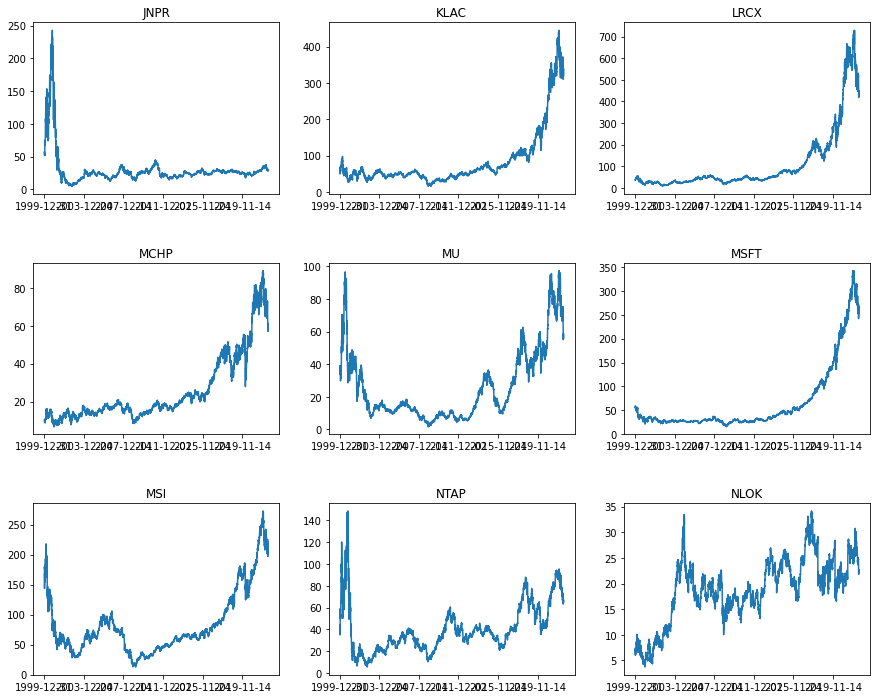

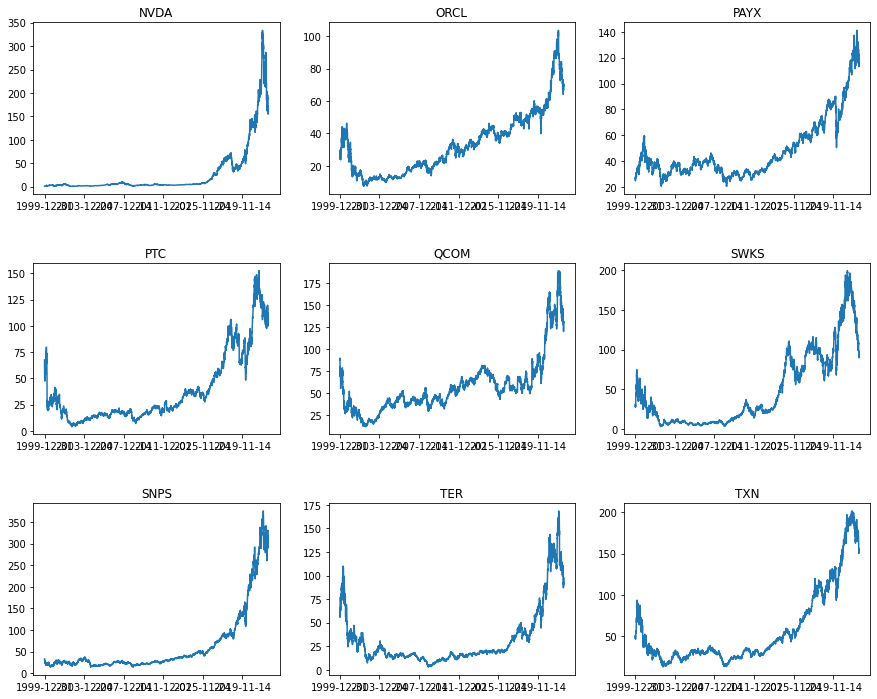

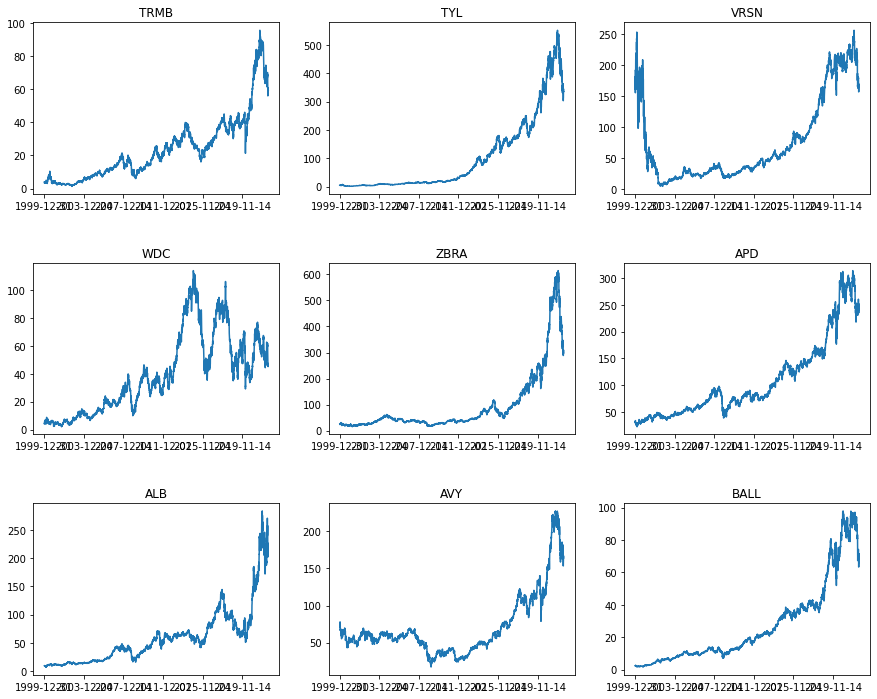

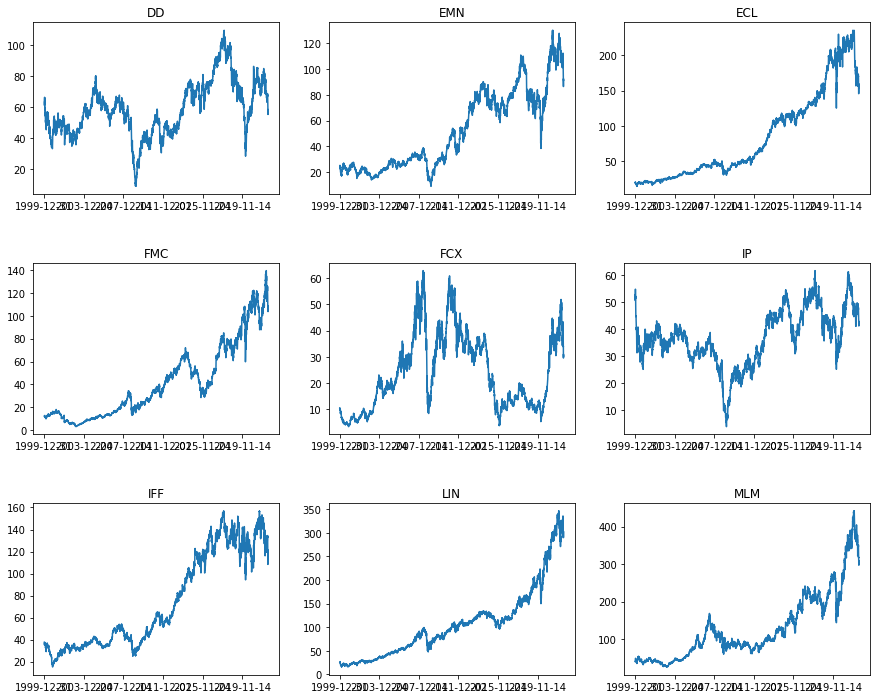

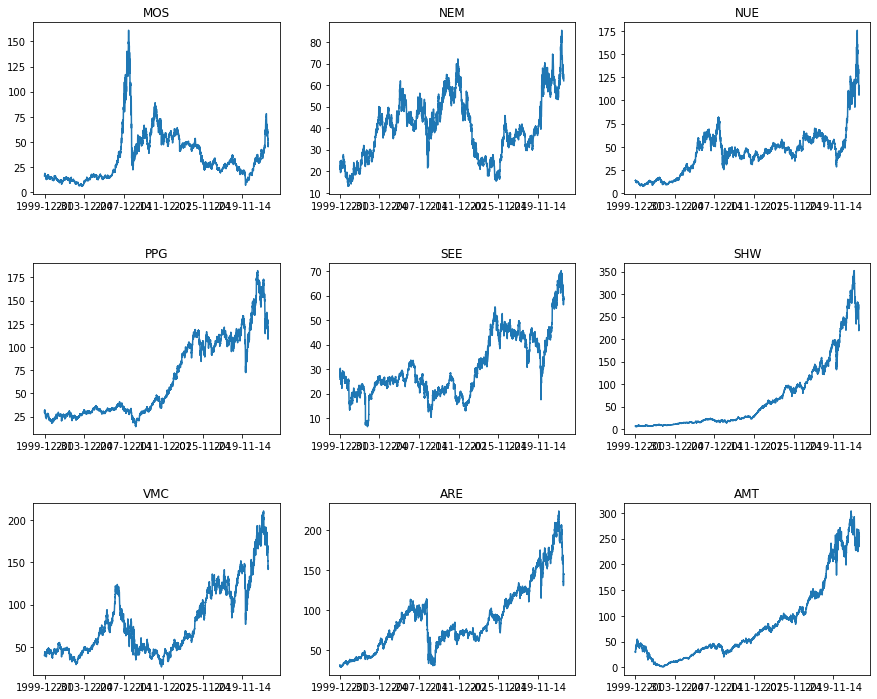

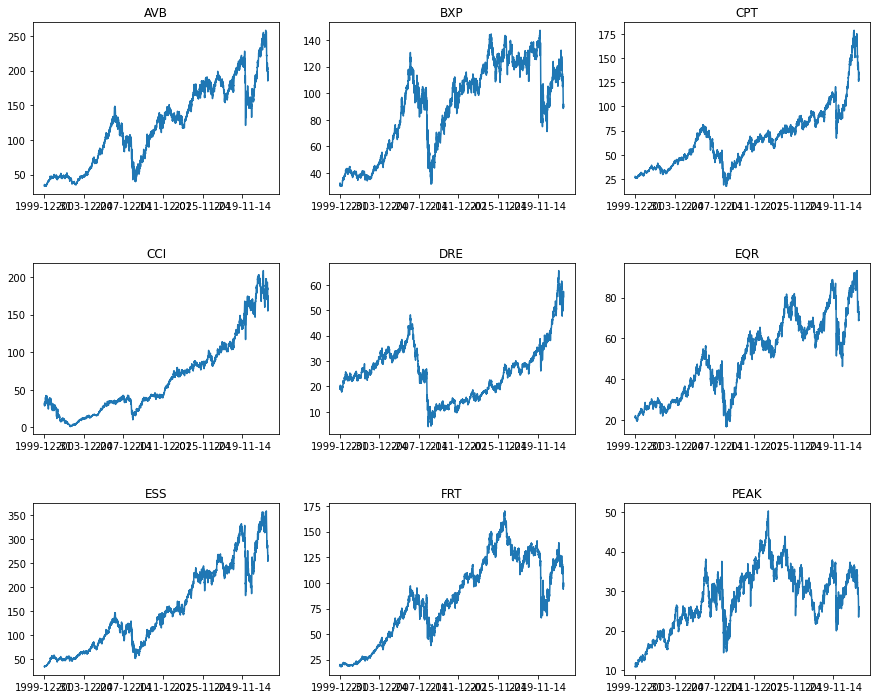

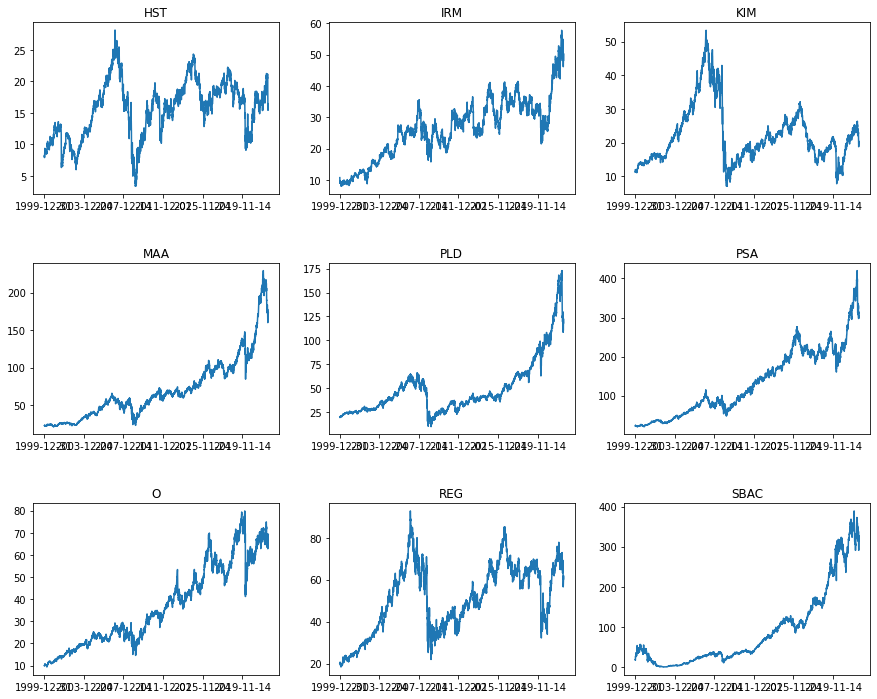

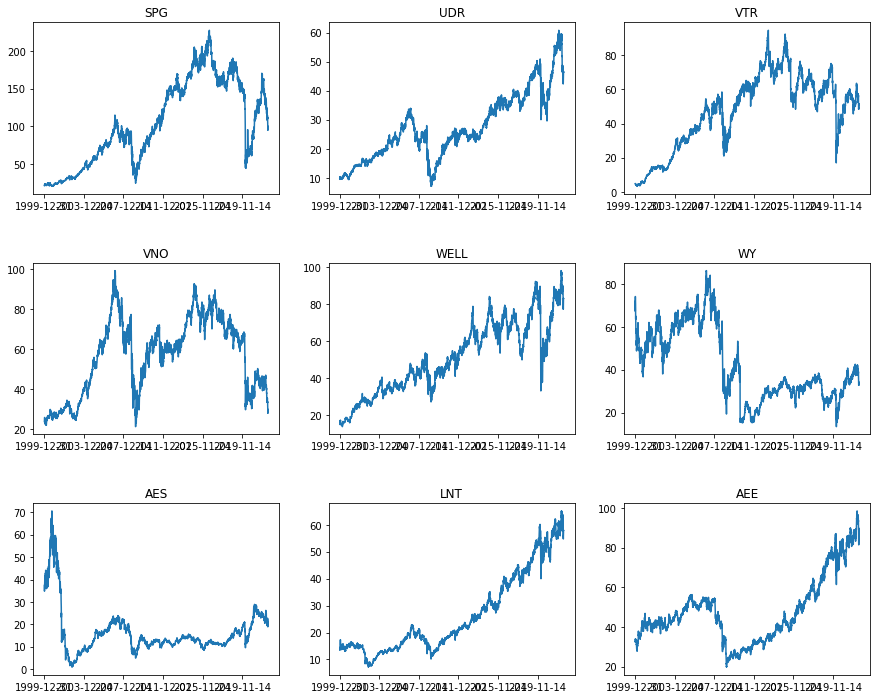

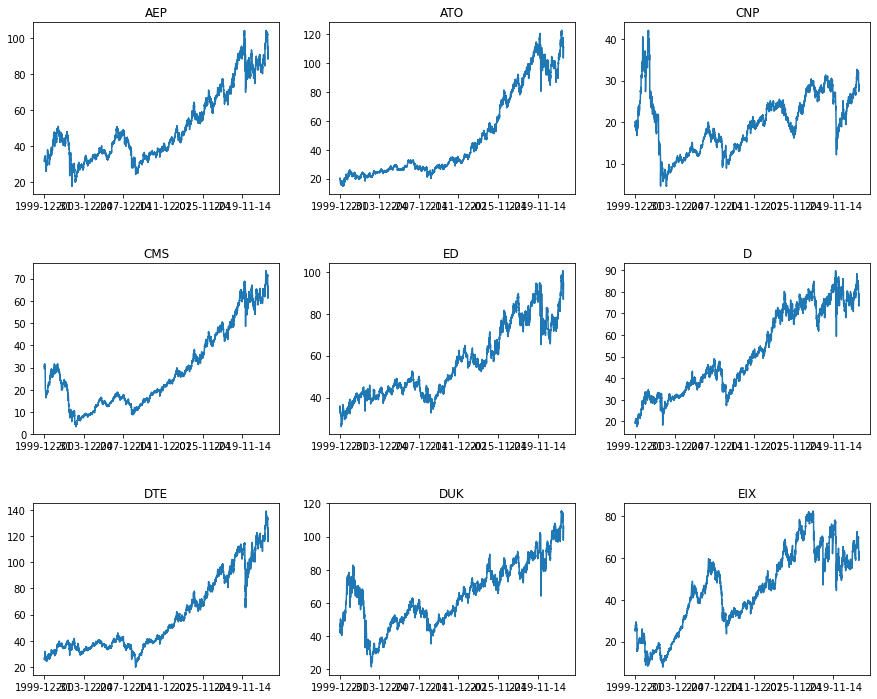

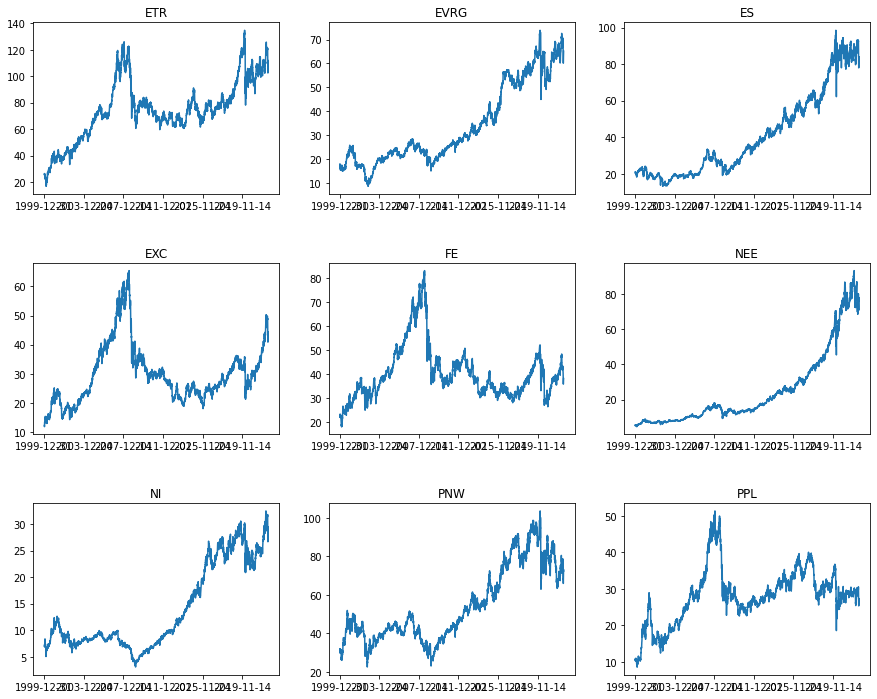

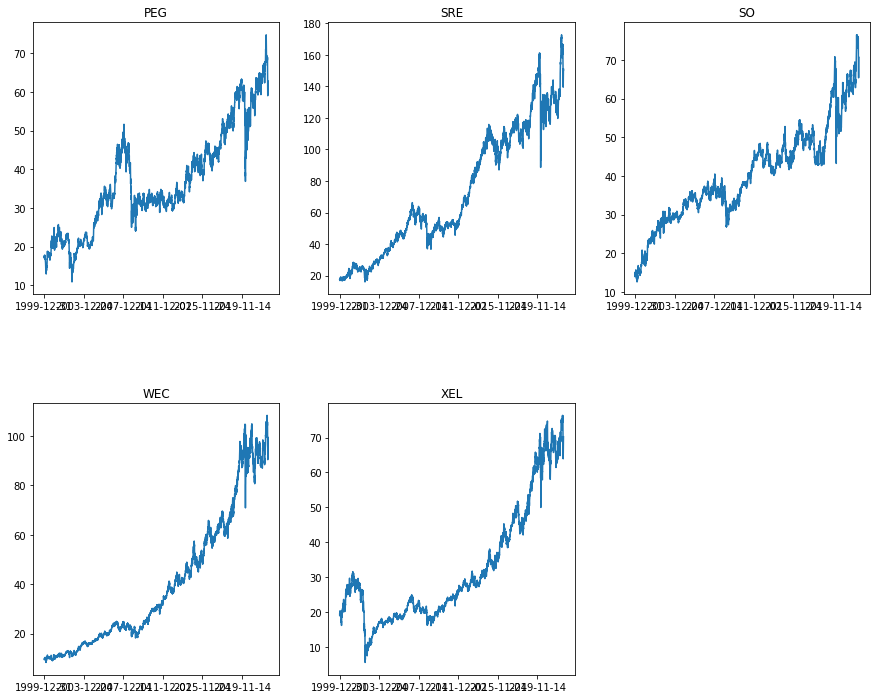

In [99]:
import warnings
warnings.filterwarnings("ignore")

tickers =list(main_df.columns[1:])
start = 0
end = len(tickers)
step = 9
plt.suptitle("Daily closing prices", fontsize=18, y=0.95)
for i in range(start, end, step):
    x = i
    tick = tickers[x:x+step]
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.4)
    ncols = 3
    nrows = len(tick) // ncols + (len(tick) % ncols > 0)

    for n, ticker in enumerate(tick):
        ax = plt.subplot(nrows, ncols, n + 1)

        main_df[ticker].plot(ax=ax)

        ax.set_title(ticker.upper())
        ax.set_xlabel("")

### 5. Remove all the stocks with more than 2 consecutive days' NAN values

In [84]:
navalues=main_df.isnull().sum()
navalues

ATVI        1
GOOGL    1164
GOOG     1164
T           1
CHTR     2518
         ... 
PEG         1
SRE         1
SO          1
WEC         1
XEL         1
Length: 503, dtype: int64

In [85]:
count=0
coms = []
for ind in navalues.index:
    if navalues[ind]>1:
        count+=1
        coms.append(ind)

In [86]:
main_df = main_df.drop(coms,axis=1)

In [87]:
main_df

ATVI          T      CMCSA       DISH        DIS          EA  \
Date                                                                            
1999-12-31   1.276042  36.820244  15.958333  48.750000  28.855125   21.000000   
2000-01-03   1.369792  35.498489  15.583333  47.593750  29.471687   25.265625   
2000-01-04   1.328125  33.421452  14.416667  45.843750  31.198063   22.343750   
2000-01-05   1.333333  33.940708  14.041667  45.687500  32.492844   22.328125   
2000-01-06   1.307292  33.043808  14.583333  41.093750  31.198063   20.000000   
...               ...        ...        ...        ...        ...         ...   
2022-06-23  76.489998  20.610001  39.110001  16.889999  94.300003  128.960007   
2022-06-24  77.940002  20.990000  39.570000  18.850000  97.779999  130.199997   
2022-06-27  78.010002  20.780001  39.830002  18.840000  96.610001  125.599998   
2022-06-28  77.160004  20.610001  39.130001  18.129999  95.919998  122.879997   
2022-06-29  77.959999  20.950001  39.330002  17.920000  95.650002  122.830002   

                  IPG     LUMN       MTCH        OMC  ...         FE  \
Date                                                  ...              
1999-12-31  57.687500  47.3750   7.648196  50.000000  ...  22.687500   
2000-01-03  54.312500  45.2500   7.527071  48.437500  ...  22.062500   
2000-01-04  50.000000  43.4375   6.921444  46.843750  ...  22.062500   
2000-01-05  48.875000  43.7500   6.661890  45.500000  ...  22.875000   
2000-01-06  49.000000  43.2500   6.938748  45.750000  ...  22.937500   
...               ...      ...        ...        ...  ...        ...   
2022-06-23  26.940001  10.9500  73.449997  62.580002  ...  36.959999   
2022-06-24  27.980000  11.2700  78.449997  64.599998  ...  37.290001   
2022-06-27  28.000000  11.3700  76.699997  64.750000  ...  38.150002   
2022-06-28  27.480000  11.2500  71.809998  63.660000  ...  37.790001   
2022-06-29  27.440001  11.2400  71.089996  63.320000  ...  38.230000   

                  NEE         NI        PNW        PPL        PEG         SRE  \
Date                                                                            
1999-12-31   5.351563   7.023576  30.562500  10.652888  17.406250   17.375000   
2000-01-03   5.156250   6.925344  29.750000  10.332719  17.031250   17.312500   
2000-01-04   5.250000   6.999018  30.125000  10.594675  17.156250   17.500000   
2000-01-05   5.421875   7.293713  30.937500  10.827525  17.593750   17.875000   
2000-01-06   5.421875   7.244597  31.125000  10.681994  17.656250   18.375000   
...               ...        ...        ...        ...        ...         ...   
2022-06-23  77.199997  27.809999  69.959999  26.610001  60.430000  146.350006   
2022-06-24  78.019997  28.620001  71.750000  27.080000  62.509998  149.440002   
2022-06-27  77.889999  29.160000  72.790001  27.360001  62.830002  150.669998   
2022-06-28  76.440002  29.350000  73.160004  27.129999  62.630001  151.210007   
2022-06-29  76.000000  29.459999  72.300003  27.059999  62.610001  150.309998   

                   SO        WEC        XEL  
Date                                         
1999-12-31  14.356150   9.625000  19.500000  
2000-01-03  13.897975   9.531250  19.000000  
2000-01-04  14.050700   9.593750  19.437500  
2000-01-05  14.776144  10.031250  20.187500  
2000-01-06  14.814325  10.000000  20.000000  
...               ...        ...        ...  
2022-06-23  69.279999  95.339996  67.279999  
2022-06-24  69.830002  97.160004  68.559998  
2022-06-27  70.370003  99.279999  69.330002  
2022-06-28  70.620003  99.120003  69.989998  
2022-06-29  70.669998  99.309998  70.209999  

[5661 rows x 366 columns]

In [89]:
main_df.dropna(subset=['ATVI'],inplace=True)

In [100]:
main_df.to_csv('sp500_close_price.csv')

### 6. Construct a correlation matrix for full-time using log returns r(t)=lnP(t)-lnP(t-1). 

In [90]:
log = main_df.copy()
for col in log.columns:
    log[col] = np.log(log[col]) - np.log(log[col].shift(1))

In [91]:
log

ATVI         T     CMCSA      DISH       DIS        EA  \
Date                                                                     
1999-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-03  0.070896 -0.036558 -0.023779 -0.024004  0.021142  0.184922   
2000-01-04 -0.030891 -0.060292 -0.077817 -0.037463  0.056926 -0.122898   
2000-01-05  0.003914  0.015417 -0.026356 -0.003414  0.040664 -0.000700   
2000-01-06 -0.019724 -0.026781  0.037850 -0.105969 -0.040664 -0.110115   
...              ...       ...       ...       ...       ...       ...   
2022-06-23  0.010382  0.014171  0.005384  0.020336  0.008520 -0.000543   
2022-06-24  0.018779  0.018270  0.011693  0.109791  0.036239  0.009569   
2022-06-27  0.000898 -0.010055  0.006549 -0.000531 -0.012038 -0.035969   
2022-06-28 -0.010956 -0.008215 -0.017731 -0.038414 -0.007168 -0.021894   
2022-06-29  0.010315  0.016362  0.005098 -0.011651 -0.002819 -0.000407   

                 IPG      LUMN      MTCH       OMC  ...        FE       NEE  \
Date                                                ...                       
1999-12-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-03 -0.060286 -0.045892 -0.015964 -0.031749  ... -0.027935 -0.037179   
2000-01-04 -0.082731 -0.040880 -0.083882 -0.033457  ...  0.000000  0.018019   
2000-01-05 -0.022757  0.007168 -0.038221 -0.029105  ...  0.036165  0.032214   
2000-01-06  0.002554 -0.011494  0.040718  0.005479  ...  0.002729  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2022-06-23 -0.010707  0.033429  0.053553 -0.009067  ...  0.020225  0.033053   
2022-06-24  0.037878  0.028805  0.065857  0.031769  ...  0.008889  0.010566   
2022-06-27  0.000715  0.008834 -0.022560  0.002319  ...  0.022801 -0.001668   
2022-06-28 -0.018746 -0.010610 -0.065878 -0.016977  ... -0.009481 -0.018791   
2022-06-29 -0.001457 -0.000889 -0.010077 -0.005355  ...  0.011576 -0.005773   

                  NI       PNW       PPL       PEG       SRE        SO  \
Date                                                                     
1999-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-03 -0.014085 -0.026945 -0.030516 -0.021779 -0.003604 -0.032435   
2000-01-04  0.010582  0.012526  0.025036  0.007313  0.010772  0.010929   
2000-01-05  0.041243  0.026614  0.021740  0.025181  0.021202  0.050342   
2000-01-06 -0.006757  0.006042 -0.013532  0.003546  0.027588  0.002581   
...              ...       ...       ...       ...       ...       ...   
2022-06-23  0.015218  0.023868  0.016673  0.010146  0.020084  0.023218   
2022-06-24  0.028710  0.025264  0.017508  0.033841  0.020894  0.007907   
2022-06-27  0.018692  0.014391  0.010287  0.005106  0.008197  0.007703   
2022-06-28  0.006495  0.005070 -0.008442 -0.003188  0.003578  0.003546   
2022-06-29  0.003741 -0.011825 -0.002583 -0.000319 -0.005970  0.000708   

                 WEC       XEL  
Date                            
1999-12-31       NaN       NaN  
2000-01-03 -0.009788 -0.025975  
2000-01-04  0.006536  0.022765  
2000-01-05  0.044593  0.037859  
2000-01-06 -0.003120 -0.009331  
...              ...       ...  
2022-06-23  0.020879  0.022547  
2022-06-24  0.018910  0.018846  
2022-06-27  0.021585  0.011169  
2022-06-28 -0.001613  0.009475  
2022-06-29  0.001915  0.003138  

[5660 rows x 366 columns]

In [92]:
log=log.iloc[1:,:]

In [93]:
cols = []
for col in log.columns:
    cols.append(lkp[merge[col]])

In [94]:
log.columns=cols

In [95]:
log

COM       COM       COM       COM       COM       COM  \
Date                                                                     
2000-01-03  0.070896 -0.036558 -0.023779 -0.024004  0.021142  0.184922   
2000-01-04 -0.030891 -0.060292 -0.077817 -0.037463  0.056926 -0.122898   
2000-01-05  0.003914  0.015417 -0.026356 -0.003414  0.040664 -0.000700   
2000-01-06 -0.019724 -0.026781  0.037850 -0.105969 -0.040664 -0.110115   
2000-01-07  0.027506  0.008535 -0.031933  0.038050 -0.015937  0.029255   
...              ...       ...       ...       ...       ...       ...   
2022-06-23  0.010382  0.014171  0.005384  0.020336  0.008520 -0.000543   
2022-06-24  0.018779  0.018270  0.011693  0.109791  0.036239  0.009569   
2022-06-27  0.000898 -0.010055  0.006549 -0.000531 -0.012038 -0.035969   
2022-06-28 -0.010956 -0.008215 -0.017731 -0.038414 -0.007168 -0.021894   
2022-06-29  0.010315  0.016362  0.005098 -0.011651 -0.002819 -0.000407   

                 COM       COM       COM       COM  ...        UT        UT  \
Date                                                ...                       
2000-01-03 -0.060286 -0.045892 -0.015964 -0.031749  ... -0.027935 -0.037179   
2000-01-04 -0.082731 -0.040880 -0.083882 -0.033457  ...  0.000000  0.018019   
2000-01-05 -0.022757  0.007168 -0.038221 -0.029105  ...  0.036165  0.032214   
2000-01-06  0.002554 -0.011494  0.040718  0.005479  ...  0.002729  0.000000   
2000-01-07  0.035091 -0.008708 -0.005000  0.041478  ...  0.005435  0.028411   
...              ...       ...       ...       ...  ...       ...       ...   
2022-06-23 -0.010707  0.033429  0.053553 -0.009067  ...  0.020225  0.033053   
2022-06-24  0.037878  0.028805  0.065857  0.031769  ...  0.008889  0.010566   
2022-06-27  0.000715  0.008834 -0.022560  0.002319  ...  0.022801 -0.001668   
2022-06-28 -0.018746 -0.010610 -0.065878 -0.016977  ... -0.009481 -0.018791   
2022-06-29 -0.001457 -0.000889 -0.010077 -0.005355  ...  0.011576 -0.005773   

                  UT        UT        UT        UT        UT        UT  \
Date                                                                     
2000-01-03 -0.014085 -0.026945 -0.030516 -0.021779 -0.003604 -0.032435   
2000-01-04  0.010582  0.012526  0.025036  0.007313  0.010772  0.010929   
2000-01-05  0.041243  0.026614  0.021740  0.025181  0.021202  0.050342   
2000-01-06 -0.006757  0.006042 -0.013532  0.003546  0.027588  0.002581   
2000-01-07 -0.003396  0.027725  0.018894 -0.007105 -0.020619  0.017880   
...              ...       ...       ...       ...       ...       ...   
2022-06-23  0.015218  0.023868  0.016673  0.010146  0.020084  0.023218   
2022-06-24  0.028710  0.025264  0.017508  0.033841  0.020894  0.007907   
2022-06-27  0.018692  0.014391  0.010287  0.005106  0.008197  0.007703   
2022-06-28  0.006495  0.005070 -0.008442 -0.003188  0.003578  0.003546   
2022-06-29  0.003741 -0.011825 -0.002583 -0.000319 -0.005970  0.000708   

                  UT        UT  
Date                            
2000-01-03 -0.009788 -0.025975  
2000-01-04  0.006536  0.022765  
2000-01-05  0.044593  0.037859  
2000-01-06 -0.003120 -0.009331  
2000-01-07  0.012423  0.000000  
...              ...       ...  
2022-06-23  0.020879  0.022547  
2022-06-24  0.018910  0.018846  
2022-06-27  0.021585  0.011169  
2022-06-28 -0.001613  0.009475  
2022-06-29  0.001915  0.003138  

[5659 rows x 366 columns]

<AxesSubplot:>

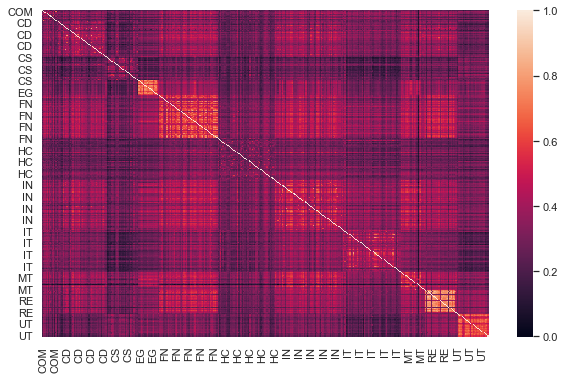

In [103]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(log.corr())

### 7. Construct correlation matrices using r(t) of epoch size 400 working days and with a shift of 200 days.

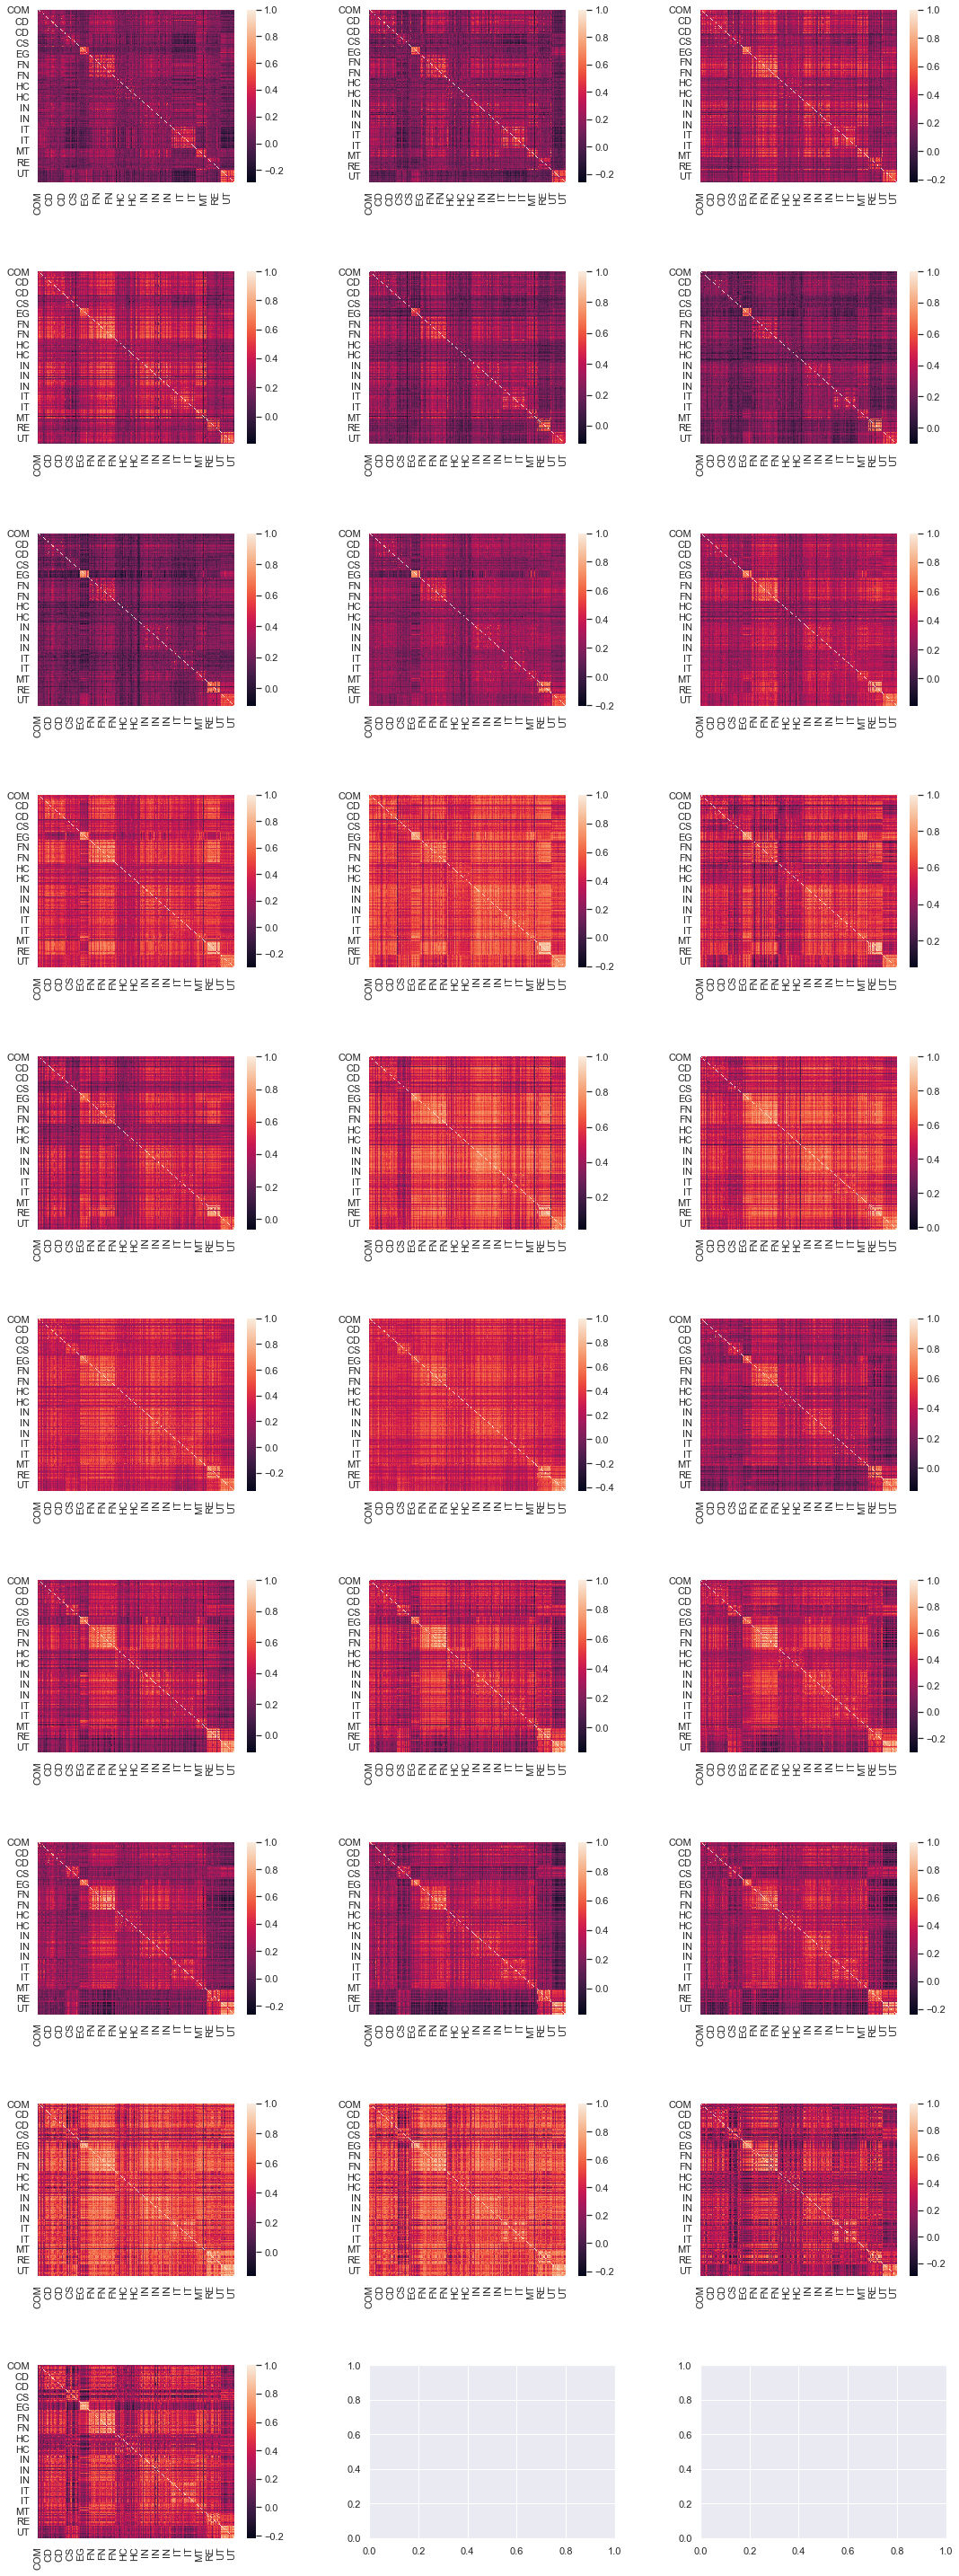

In [104]:
n =  len(log)
fig, axes = plt.subplots((n//200)//3 + 1 ,3,figsize=(15,40))
j = 0
for i in range(0,n-200,200):
    temp = log.iloc[i:i+400,:]
    sns.heatmap(temp.corr(), ax=axes[j//3][j%3])
    j += 1
    fig.tight_layout(h_pad=5, w_pad=5)